In [2]:
import scirpy as ir
import scvi
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
from harmonypy import run_harmony

In [16]:
import muon as mu

In [17]:
# Merguing modalities

In [3]:
adata = sc.read('../objects/data.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata.obs.index = [i.split('_')[0]+'_'+adata.obs.loc[i,'sample_barcode'] for i in adata.obs.index]
adata.obs

library sample_barcode  sample_name  \
AAACCAAAGCAACGTC-1_S744   L1051           S744         2869   
AAACCAGCAAATGGCA-1_S744   L1051           S744         2869   
AAACCAGCAACAGGAC-1_S744   L1051           S744         2869   
AAACCAGCAACTGCCA-1_S744   L1051           S744         2869   
AAACCAGCACACGTCA-1_S744   L1051           S744         2869   
...                         ...            ...          ...   
GTTGTCTTCACACTTC-1_S760   L1067           S760         7289   
GTTGTCTTCCACAAGC-1_S760   L1067           S760         7289   
GTTGTCTTCCACGAGT-1_S760   L1067           S760         7289   
GTTGTGCAGCATTAAC-1_S760   L1067           S760         7289   
GTTGTGGGTGTTGGAT-1_S760   L1067           S760         7289   

                                      source  DoubletDetection  \
AAACCAAAGCAACGTC-1_S744                mouse               0.0   
AAACCAGCAAATGGCA-1_S744                mouse               0.0   
AAACCAGCAACAGGAC-1_S744                mouse               0.0   
AAACCAGCAACTGCCA-1_S744                mouse               0.0   
AAACCAGCACACGTCA-1_S744                mouse               0.0   
...                                      ...               ...   
GTTGTCTTCACACTTC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACAAGC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACGAGT-1_S760  murine immune cells               0.0   
GTTGTGCAGCATTAAC-1_S760  murine immune cells               0.0   
GTTGTGGGTGTTGGAT-1_S760  murine immune cells               0.0   

                         DoubletDetection_score  
AAACCAAAGCAACGTC-1_S744            1.750079e-04  
AAACCAGCAAATGGCA-1_S744            7.553695e-05  
AAACCAGCAACAGGAC-1_S744            5.164267e+01  
AAACCAGCAACTGCCA-1_S744            1.337205e-08  
AAACCAGCACACGTCA-1_S744            5.506957e+00  
...                                         ...  
GTTGTCTTCACACTTC-1_S760            2.664592e-03  
GTTGTCTTCCACAAGC-1_S760            4.123341e-05  
GTTGTCTTCCACGAGT-1_S760            1.779316e-12  
GTTGTGCAGCATTAAC-1_S760            3.330369e-04  
GTTGTGGGTGTTGGAT-1_S760            1.736364e-62  

[80668 rows x 6 columns]

In [7]:
meta = pd.read_excel('../../AJANIC_01_Internal barcoding SCU.xlsx', index_col=0)
meta.columns = meta.iloc[1]
meta = meta.iloc[2:]
meta.index = meta['LIBRARY BARCODE']
meta

PROJECT         SUBPROJECT                 DATE  \
LIBRARY BARCODE                                   
L1035            AJANIC_01  2025-02-13 00:00:00   
L1037            AJANIC_01  2025-02-13 00:00:00   
L1038            AJANIC_01  2025-02-13 00:00:00   
L1039            AJANIC_01  2025-02-13 00:00:00   
L1040            AJANIC_01  2025-02-13 00:00:00   
L1041            AJANIC_01  2025-02-13 00:00:00   
L1042            AJANIC_01  2025-02-20 00:00:00   
L1043            AJANIC_01  2025-02-20 00:00:00   
L1044            AJANIC_01  2025-02-20 00:00:00   
L1045            AJANIC_01  2025-02-20 00:00:00   
L1046            AJANIC_01  2025-02-20 00:00:00   
L1047            AJANIC_01  2025-02-20 00:00:00   
L1048            AJANIC_01  2025-02-20 00:00:00   
L1049            AJANIC_01  2025-02-20 00:00:00   
L1050            AJANIC_01  2025-02-20 00:00:00   
L1051            AJANIC_01  2025-02-20 00:00:00   
L1052            AJANIC_01  2025-02-20 00:00:00   
L1053            AJANIC_01  2025-02-20 00:00:00   
L1063            AJANIC_01  2025-03-27 00:00:00   
L1064            AJANIC_01  2025-03-27 00:00:00   
L1065            AJANIC_01  2025-03-27 00:00:00   
L1066            AJANIC_01  2025-03-27 00:00:00   
L1067            AJANIC_01  2025-03-27 00:00:00   
L1068            AJANIC_01  2025-03-27 00:00:00   

PROJECT                                PROTOCOL        SAMPLE SOURCE  \
LIBRARY BARCODE                                                        
L1035            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1037            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1038            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1039            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1040            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1041            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1042            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1043            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1044            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1045            Chromium GEM-X scRNAseq 5'-TCR                mouse   
L1046            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1047            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1048            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1049            Chromium GEM-X scRNAseq 5'-BCR                mouse   
L1050            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1051            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1052            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1053            Chromium GEM-X scRNAseq 5'-GEX                mouse   
L1063            Chromium GEM-X scRNAseq 5'-TCR  murine immune cells   
L1064            Chromium GEM-X scRNAseq 5'-TCR  murine immune cells   
L1065            Chromium GEM-X scRNAseq 5'-BCR  murine immune cells   
L1066            Chromium GEM-X scRNAseq 5'-BCR  murine immune cells   
L1067            Chromium GEM-X scRNAseq 5'-GEX  murine immune cells   
L1068            Chromium GEM-X scRNAseq 5'-GEX  murine immune cells   

PROJECT         SAMPLE  NAME SAMPLE BARCODE LIBRARY BARCODE  \
LIBRARY BARCODE                                               
L1035                   2866           S741           L1035   
L1037                   2879           S742           L1037   
L1038                   2866           S741           L1038   
L1039                   2879           S742           L1039   
L1040                   2866           S741           L1040   
L1041                   2879           S742           L1041   
L1042                   2867           S743           L1042   
L1043                   2869           S744           L1043   
L1044                   2871           S745           L1044   
L1045                   2872           S746           L1045   
L1046                   2867           S743 

In [8]:
meta['omic'] = [i.split('-')[-1] for i in meta['PROTOCOL']]
meta['omic']

LIBRARY BARCODE
L1035    TCR
L1037    TCR
L1038    BCR
L1039    BCR
L1040    GEX
L1041    GEX
L1042    TCR
L1043    TCR
L1044    TCR
L1045    TCR
L1046    BCR
L1047    BCR
L1048    BCR
L1049    BCR
L1050    GEX
L1051    GEX
L1052    GEX
L1053    GEX
L1063    TCR
L1064    TCR
L1065    BCR
L1066    BCR
L1067    GEX
L1068    GEX
Name: omic, dtype: object

In [10]:
meta[meta['omic']=='TCR'].index.tolist()

['L1035', 'L1037', 'L1042', 'L1043', 'L1044', 'L1045', 'L1063', 'L1064']

In [ ]:
import pandas as pd

adatas=[]
samples = meta[meta['omic']=='TCR'].index.tolist()
keys=[]
for i in samples:
    if os.path.exists(f'../../raw/{i}/filtered_contig_annotations.csv'):
        print
        a = ir.io.read_10x_vdj(f'../../raw/{i}/filtered_contig_annotations.csv')
        a.obs['library'] = i
        a.obs['sample_barcode'] = meta.loc[i]['SAMPLE BARCODE']
        a.obs['sample_name'] = meta.loc[i]['SAMPLE  NAME']
        a.obs['source'] = meta.loc[i]['SAMPLE SOURCE']
        keys.append(meta.loc[i]['SAMPLE BARCODE'])
        adatas.append(a)
adata_tcr = ad.concat(adatas,index_unique='_',keys=keys,label=None, join='outer')
adata_tcr

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Outer joins on awkward.Arrays will have different return values in the future. For details, and to offer input, please see:

	https://github.com/scverse/anndata/issues/898
  warnings.warn(msg, category, stacklevel=stacklevel)


AnnData object with n_obs × n_vars = 22938 × 0
    obs: 'library', 'sample_barcode', 'sample_name', 'source'
    obsm: 'airr'

In [ ]:
import pandas as pd

adatas=[]
samples = meta[meta['omic']=='BCR'].index.tolist()
keys=[]
for i in samples:
    if os.path.exists(f'../../raw/{i}/filtered_contig_annotations.csv'):
        a = ir.io.read_10x_vdj(f'../../raw/{i}/filtered_contig_annotations.csv')
        a.obs['library'] = i
        a.obs['sample_barcode'] = meta.loc[i]['SAMPLE BARCODE']
        a.obs['sample_name'] = meta.loc[i]['SAMPLE  NAME']
        a.obs['source'] = meta.loc[i]['SAMPLE SOURCE']
        keys.append(meta.loc[i]['SAMPLE BARCODE'])
        adatas.append(a)
adata_bcr = ad.concat(adatas,index_unique='_',keys=keys,label=None, join='outer')
adata_bcr

In [ ]:
mdata = mu.MuData({'gex':adata,'airr_tcr':adata_tcr,'airr_bcr':adata_bcr})
mdata

MuData object with n_obs × n_vars = 81316 × 33696
  3 modalities
    gex:	80668 x 33696
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score'
    airr_tcr:	22938 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source'
      obsm:	'airr'
    airr_bcr:	12252 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source'
      obsm:	'airr'

In [ ]:
mdata.write('../objects/mdata_raw.h5mu', compression='gzip')

# COMPUTING LATENT SPACE AND MERGUE ANNOTATION for RNA

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` par

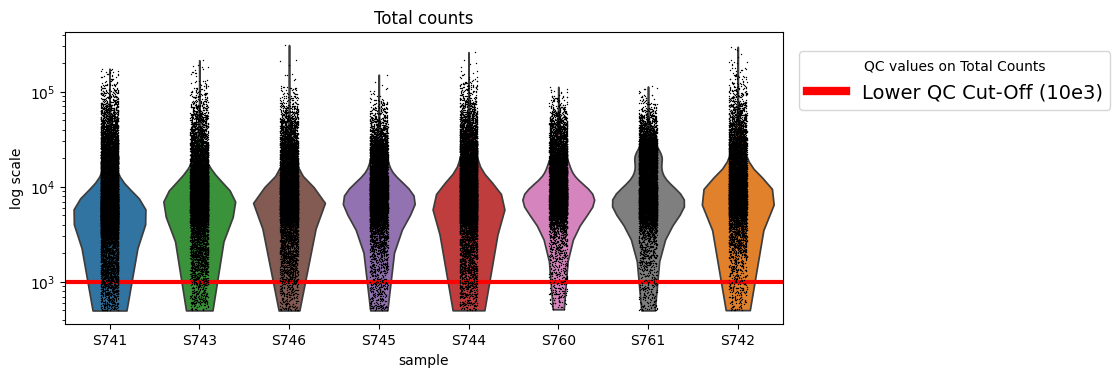

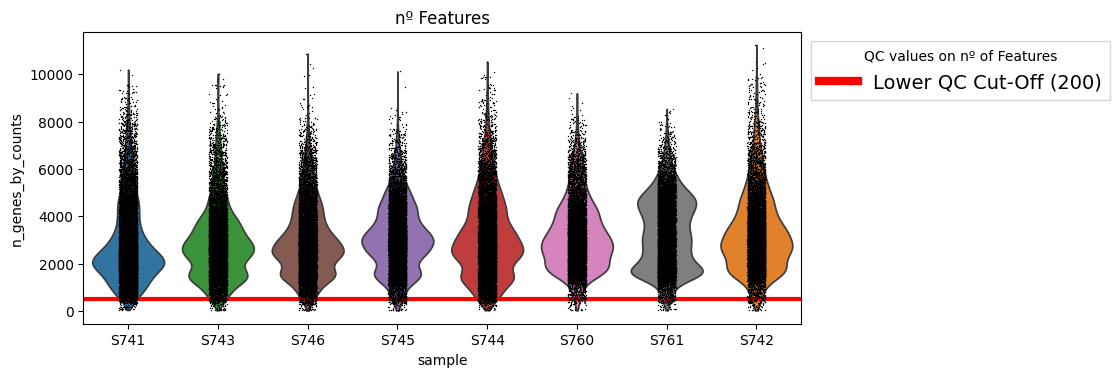

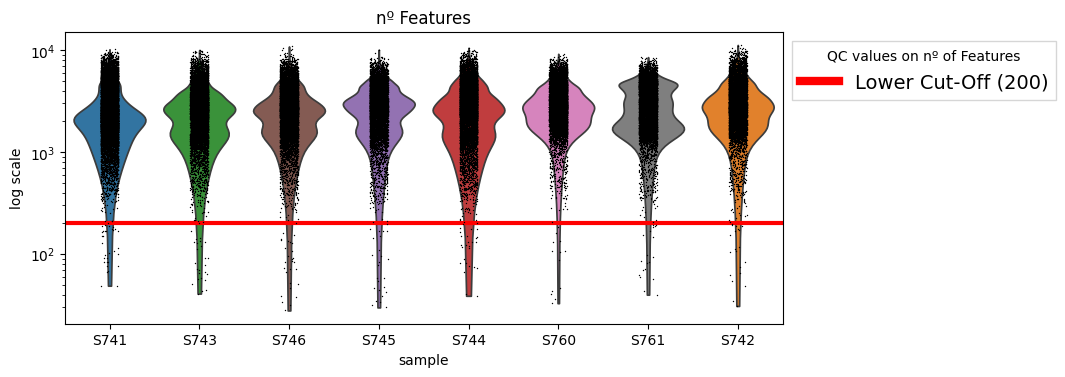

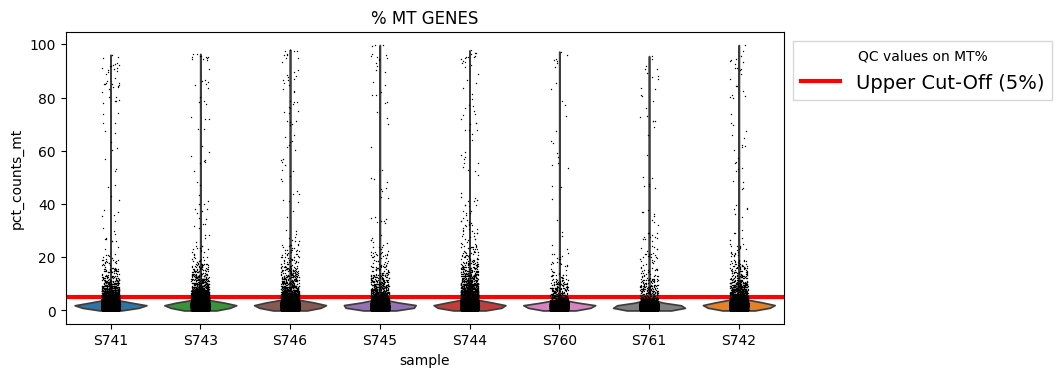

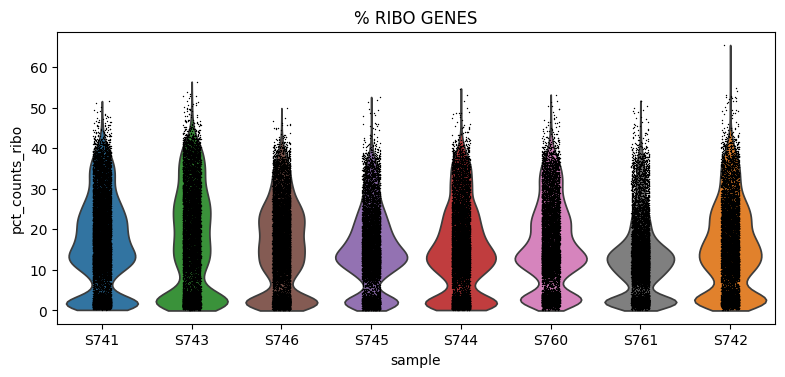

In [5]:
adata.obs['sample'] = adata.obs['sample_barcode']



# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(('Rpl', 'Rps', 'Mrpl', 'Mrps'))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^Hb[^(p)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)    



list_val = []
list_sample = []
for i in adata.obs['sample'].unique():
    prim = adata[adata.obs['sample'].isin([i])]
    list_val.append(np.sum(prim.obs['n_genes_by_counts'])/prim.shape[0])
    list_sample.append(i)
sort_l = np.argsort(list_val)
order = [list_sample[i] for i in sort_l]


# sc.pl.violin(
#     adata,
#     ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
#     jitter=0.4,
#     multi_panel=True,
# )
# rcParams['figure.figsize'] = (10,4)
rcParams['figure.figsize'] = (8,4)

a = sc.pl.violin(adata, keys = ['total_counts'] ,show=False, log = True, groupby='sample',order = order)
l1 = a.axhline(1000, color='red',linewidth = 3)
a.set_title('Total counts')
a.set_ylabel('log scale')

leg = a.legend([l1],['Lower QC Cut-Off (10e3)'],loc = 'lower center',fontsize = 14, title = 'QC values on Total Counts',
  fancybox=True, ncol=4,   bbox_to_anchor = (1.24, 0.7))
for line in leg.get_lines():
    line.set_linewidth(6.0)
plt.savefig(f'../../figures/QC_violin_total_counts.pdf',  bbox_inches='tight', dpi=600)


a = sc.pl.violin(adata, keys = ['n_genes_by_counts'] ,show=False, log = False, groupby='sample', order = order)
# l1 = a.axhline(8000, color='red',linewidth = 3)
l1_5 = a.axhline(500, color='red',linewidth = 3, )

a.set_title('nº Features')
# a.set_ylabel('log scale')
leg = a.legend([l1_5],['Lower QC Cut-Off (200)'],fontsize = 14, title = 'QC values on nº of Features',
  fancybox=False, ncol=1,   bbox_to_anchor = (1,1))
for line in leg.get_lines():
    line.set_linewidth(6.0)
plt.savefig(f'../../figures/QC_violin_n_genes_by_counts.pdf', bbox_inches='tight', dpi=600)


a = sc.pl.violin(adata, keys = ['n_genes_by_counts'] ,show=False, log = True, groupby='sample', order = order)
# l1 = a.axhline(8000, color='red',linewidth = 3)
l1_5 = a.axhline(200, color='red',linewidth = 3, )

a.set_title('nº Features')
# a.set_ylabel('log scale')
leg = a.legend([l1_5],['Lower Cut-Off (200)'],fontsize = 14, title = 'QC values on nº of Features',
  fancybox=False, ncol=1,   bbox_to_anchor = (1,1))
for line in leg.get_lines():
    line.set_linewidth(6.0)
a.set_ylabel('log scale')
plt.savefig(f'../../figures/QC_violin_n_genes_by_counts_log.pdf', bbox_inches='tight', dpi=600)



a = sc.pl.violin(adata, keys = ['pct_counts_mt'] ,show=False, log = False, groupby='sample', order = order)
l1 = a.axhline(5, color='red',linewidth = 3)

a.set_title('% MT GENES')
# a.set_ylabel('log scale')
leg = a.legend([l1],['Upper Cut-Off (5%)'],fontsize = 14, title = 'QC values on MT%',
  fancybox=False, ncol=1,   bbox_to_anchor = (1,1))
plt.savefig(f'../../figures/QC_violin_pct_counts_mt.pdf', bbox_inches='tight', dpi=600)
a = sc.pl.violin(adata, keys = ['pct_counts_ribo'] ,show=False, log = False, groupby='sample', order = order)
# l1 = a.axhline(10, color='red',linewidth = 3)

a.set_title('% RIBO GENES')
# a.set_ylabel('log scale')
# leg = a.legend([l1,l1_5],['Upper Cut-Off (20)'],fontsize = 14, title = 'QC values on nº of Features',
#   fancybox=False, ncol=1,   bbox_to_anchor = (1,1))
plt.savefig(f'../../figures/QC_violin_pct_counts_ribo.pdf', bbox_inches='tight', dpi=600)

In [58]:
min_genes = 500
# max_genes = 6000
min_counts = 1000
# max_counts = 30000
max_mt = 5  # percent
# max_ribo = 40  # optional: if using ribosomal percentage

# Create boolean flags for each QC check
adata.obs['qc_fail_low_n_genes']  = adata.obs['n_genes_by_counts'] < min_genes
# adata.obs['qc_fail_high_n_genes'] = adata.obs['n_genes_by_counts'] > max_genes
adata.obs['qc_fail_low_counts']   = adata.obs['total_counts'] < min_counts
# adata.obs['qc_fail_high_counts']  = adata.obs['total_counts'] > max_counts
adata.obs['qc_fail_high_mt']      = adata.obs['pct_counts_mt'] > max_mt
# adata.obs['qc_fail_high_ribo']    = adata.obs['pct_counts_ribo'] > max_ribo
adata.obs['qc_fail_doublet']      = adata.obs['DoubletDetection'] > 0

# Annotate reason(s) for failing
def annotate_qc_failure(row):
    reasons = []
    if row['qc_fail_low_n_genes']: reasons.append('low_n_genes')
    # if row['qc_fail_high_n_genes']: reasons.append('high_n_genes')
    if row['qc_fail_low_counts']: reasons.append('low_counts')
    # if row['qc_fail_high_counts']: reasons.append('high_counts')
    if row['qc_fail_high_mt']: reasons.append('high_mt')
    # if row['qc_fail_high_ribo']: reasons.append('high_ribo')
    if row['qc_fail_doublet']: reasons.append('doublet')

    return ';'.join(reasons) if reasons else 'pass_qc'

adata.obs['qc_filter_reason'] = adata.obs.apply(annotate_qc_failure, axis=1)

In [22]:
adata.obs.to_csv('../objects/qc_metadata.csv')

In [23]:
qc_metadata=pd.read_csv('../objects/qc_metadata.csv', index_col=0)

In [24]:
qc_metadata

library sample_barcode  sample_name  \
AAACCAAAGCAACGTC-1_S744   L1051           S744         2869   
AAACCAGCAAATGGCA-1_S744   L1051           S744         2869   
AAACCAGCAACAGGAC-1_S744   L1051           S744         2869   
AAACCAGCAACTGCCA-1_S744   L1051           S744         2869   
AAACCAGCACACGTCA-1_S744   L1051           S744         2869   
...                         ...            ...          ...   
GTTGTCTTCACACTTC-1_S760   L1067           S760         7289   
GTTGTCTTCCACAAGC-1_S760   L1067           S760         7289   
GTTGTCTTCCACGAGT-1_S760   L1067           S760         7289   
GTTGTGCAGCATTAAC-1_S760   L1067           S760         7289   
GTTGTGGGTGTTGGAT-1_S760   L1067           S760         7289   

                                      source  DoubletDetection  \
AAACCAAAGCAACGTC-1_S744                mouse               0.0   
AAACCAGCAAATGGCA-1_S744                mouse               0.0   
AAACCAGCAACAGGAC-1_S744                mouse               0.0   
AAACCAGCAACTGCCA-1_S744                mouse               0.0   
AAACCAGCACACGTCA-1_S744                mouse               0.0   
...                                      ...               ...   
GTTGTCTTCACACTTC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACAAGC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACGAGT-1_S760  murine immune cells               0.0   
GTTGTGCAGCATTAAC-1_S760  murine immune cells               0.0   
GTTGTGGGTGTTGGAT-1_S760  murine immune cells               0.0   

                         DoubletDetection_score sample  n_genes_by_counts  \
AAACCAAAGCAACGTC-1_S744            1.750079e-04   S744               3099   
AAACCAGCAAATGGCA-1_S744            7.553695e-05   S744               4558   
AAACCAGCAACAGGAC-1_S744            5.164267e+01   S744               6526   
AAACCAGCAACTGCCA-1_S744            1.337205e-08   S744               3753   
AAACCAGCACACGTCA-1_S744            5.506957e+00   S744               5384   
...                                         ...    ...                ...   
GTTGTCTTCACACTTC-1_S760            2.664592e-03   S760               3873   
GTTGTCTTCCACAAGC-1_S760            4.123341e-05   S760               2355   
GTTGTCTTCCACGAGT-1_S760            1.779316e-12   S760               3354   
GTTGTGCAGCATTAAC-1_S760            3.330369e-04   S760               2668   
GTTGTGGGTGTTGGAT-1_S760            1.736364e-62   S760               1656   

                         log1p_n_genes_by_counts  total_counts  ...  \
AAACCAAAGCAACGTC-1_S744                 8.039157        9101.0  ...   
AAACCAGCAAATGGCA-1_S744                 8.424859       20352.0  ...   
AAACCAGCAACAGGAC-1_S744                 8.783703       44235.0  ...   
AAACCAGCAACTGCCA-1_S744                 8.230577       16019.0  ...   
AAACCAGCACACGTCA-1_S744                 8.591373       24920.0  ...   
...                                          ...           ...  ...   
GTTGTCTTCACACTTC-1_S760                 8.262043       13291.0  ...   
GTTGTCTTCCACAAGC-1_S760                 7.764721        4850.0  ...   
GTTGTCTTCCACGAGT-1_S760                 8.118207        9415.0  ...   
GTTGTGCAGCATTAAC-1_S760                 7.889459        7629.0  ...   
GTTGTGGGTGTTGGAT-1_S760                 7.412764        6186.0  ...   

                         log1p_total_counts_ribo  pct_counts_ribo  \
AAACCAAAGCAACGTC-1_S744                 7.513709        20.129658   
AAACCAGCAAATGGCA-1_S744                 8.003029        14.686518   
AAACCAGCAACAGGAC-1_S744                 8.686260        13.383068   
AAACCAGCAACTGCCA-1_S744                 8.701014        37.505463   
AAACCAGCACACGTCA-1_S744                 8.226306        14.995988   
...                                          ...              ...   
GTTGTCTTCACACTTC-1_S760                 7.990238        22.202993   
GTTGTCTTCCACAAGC-1_S760                 5.560682         5.340206   
GTTGTCTTCCACGAGT-1_S760                 7.058758        12.342008   
GTTGTG

In [ ]:
adata = sc.read('../objects/data_annotated_l1.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [26]:
adata

AnnData object with n_obs × n_vars = 80570 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Annotation_l1_colors', 'Annotation_l2_colors', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'l

In [27]:
adata.obs.index = [i.split('_')[0]+'_'+adata.obs.loc[i,'sample_barcode'] for i in adata.obs.index]
adata.obs

library sample_barcode  sample_name  \
AAACCAAAGCAACGTC-1_S744   L1051           S744         2869   
AAACCAGCAAATGGCA-1_S744   L1051           S744         2869   
AAACCAGCAACAGGAC-1_S744   L1051           S744         2869   
AAACCAGCAACTGCCA-1_S744   L1051           S744         2869   
AAACCAGCACACGTCA-1_S744   L1051           S744         2869   
...                         ...            ...          ...   
GTTGTCTTCACACTTC-1_S760   L1067           S760         7289   
GTTGTCTTCCACAAGC-1_S760   L1067           S760         7289   
GTTGTCTTCCACGAGT-1_S760   L1067           S760         7289   
GTTGTGCAGCATTAAC-1_S760   L1067           S760         7289   
GTTGTGGGTGTTGGAT-1_S760   L1067           S760         7289   

                                      source  DoubletDetection  \
AAACCAAAGCAACGTC-1_S744                mouse               0.0   
AAACCAGCAAATGGCA-1_S744                mouse               0.0   
AAACCAGCAACAGGAC-1_S744                mouse               0.0   
AAACCAGCAACTGCCA-1_S744                mouse               0.0   
AAACCAGCACACGTCA-1_S744                mouse               0.0   
...                                      ...               ...   
GTTGTCTTCACACTTC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACAAGC-1_S760  murine immune cells               0.0   
GTTGTCTTCCACGAGT-1_S760  murine immune cells               0.0   
GTTGTGCAGCATTAAC-1_S760  murine immune cells               0.0   
GTTGTGGGTGTTGGAT-1_S760  murine immune cells               0.0   

                         DoubletDetection_score sample  n_genes_by_counts  \
AAACCAAAGCAACGTC-1_S744            1.750079e-04  L1051               3099   
AAACCAGCAAATGGCA-1_S744            7.553695e-05  L1051               4558   
AAACCAGCAACAGGAC-1_S744            5.164267e+01  L1051               6526   
AAACCAGCAACTGCCA-1_S744            1.337205e-08  L1051               3753   
AAACCAGCACACGTCA-1_S744            5.506957e+00  L1051               5384   
...                                         ...    ...                ...   
GTTGTCTTCACACTTC-1_S760            2.664592e-03  L1067               3873   
GTTGTCTTCCACAAGC-1_S760            4.123341e-05  L1067               2355   
GTTGTCTTCCACGAGT-1_S760            1.779316e-12  L1067               3354   
GTTGTGCAGCATTAAC-1_S760            3.330369e-04  L1067               2668   
GTTGTGGGTGTTGGAT-1_S760            1.736364e-62  L1067               1656   

                         log1p_n_genes_by_counts  total_counts  ...  \
AAACCAAAGCAACGTC-1_S744                 8.039157        9101.0  ...   
AAACCAGCAAATGGCA-1_S744                 8.424859       20352.0  ...   
AAACCAGCAACAGGAC-1_S744                 8.783703       44235.0  ...   
AAACCAGCAACTGCCA-1_S744                 8.230577       16019.0  ...   
AAACCAGCACACGTCA-1_S744                 8.591373       24920.0  ...   
...                                          ...           ...  ...   
GTTGTCTTCACACTTC-1_S760                 8.262043       13291.0  ...   
GTTGTCTTCCACAAGC-1_S760                 7.764721        4850.0  ...   
GTTGTCTTCCACGAGT-1_S760                 8.118207        9415.0  ...   
GTTGTGCAGCATTAAC-1_S760                 7.889459        7629.0  ...   
GTTGTGGGTGTTGGAT-1_S760                 7.412764        6186.0  ...   

                         pct_counts_ribo  total_counts_hb  \
AAACCAAAGCAACGTC-1_S744        20.129658              0.0   
AAACCAGCAAATGGCA-1_S744        14.686518              0.0   
AAACCAGCAACAGGAC-1_S744        13.383068              3.0   
AAACCAGCAACTGCCA-1_S744        37.505463              0.0   
AAACCAGCACACGTCA-1_S744        14.995988              1.0   
...                                  ...              ...   
GTTGTCTTCACACTTC-1_S760        22.202993              1.0   
GTTGTCTTCCACAAGC-1_S760         5.340206              0.0   
GTTGTCTTCCACGAGT-1_S760        12.342008              0.0   
GTTGTGCAGCATTAAC-1_S760        13.173418              0.0   
GTTGTGGGTGTTGGAT-1_S760  

In [28]:
for col in ['n_genes_by_counts','pct_counts_mt','total_counts','qc_filter_reason']:
    adata.obs[col] = qc_metadata[col]

In [29]:
adata.obs['DoubletDetection']

AAACCAAAGCAACGTC-1_S744    0.0
AAACCAGCAAATGGCA-1_S744    0.0
AAACCAGCAACAGGAC-1_S744    0.0
AAACCAGCAACTGCCA-1_S744    0.0
AAACCAGCACACGTCA-1_S744    0.0
                          ... 
GTTGTCTTCACACTTC-1_S760    0.0
GTTGTCTTCCACAAGC-1_S760    0.0
GTTGTCTTCCACGAGT-1_S760    0.0
GTTGTGCAGCATTAAC-1_S760    0.0
GTTGTGGGTGTTGGAT-1_S760    0.0
Name: DoubletDetection, Length: 80570, dtype: float64

In [30]:
adata.obs['qc_filter_reason'].value_counts()

pass_qc                           71977
high_mt                            3885
doublet                            2989
low_counts                          468
low_n_genes;low_counts;high_mt      402
low_n_genes;low_counts              395
low_counts;high_mt                  273
low_n_genes;high_mt                 123
high_mt;doublet                      30
low_n_genes                          28
Name: qc_filter_reason, dtype: int64

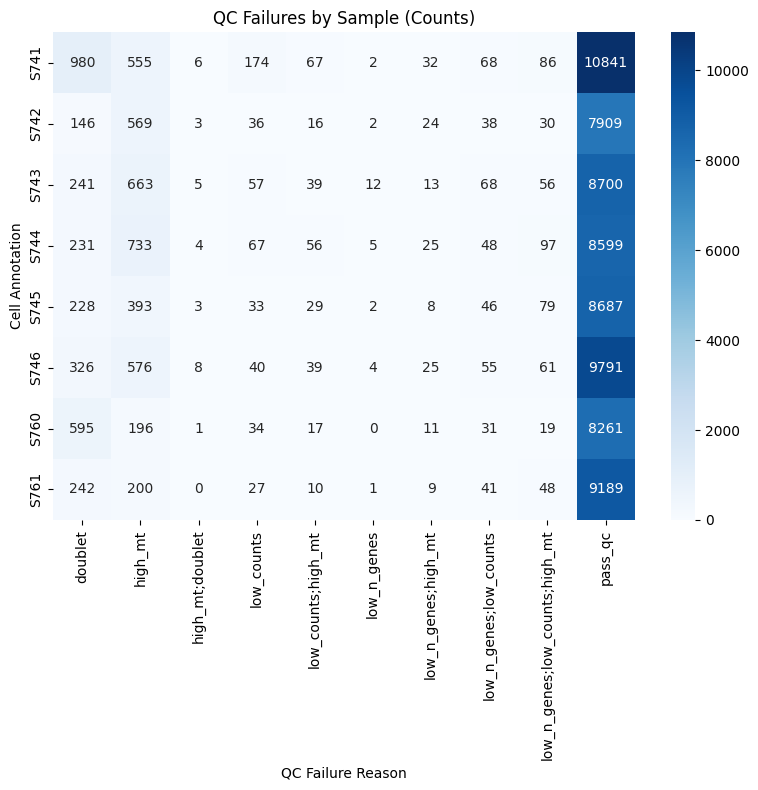

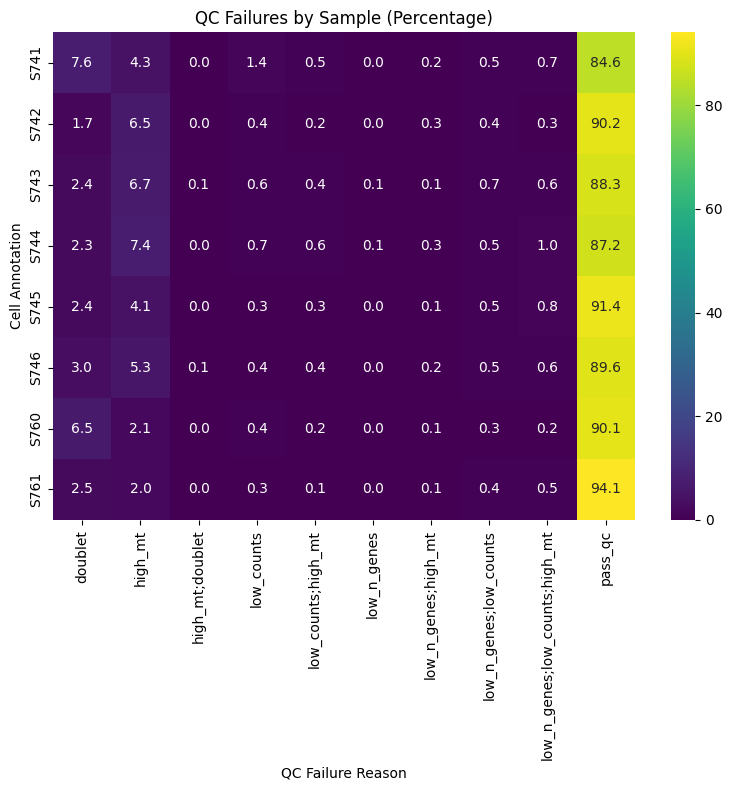

In [64]:
qc_ct = pd.crosstab(adata.obs['sample_barcode'], adata.obs['qc_filter_reason'])

# Optional: normalize by row (i.e., percentage within each annotation)
qc_ct_pct = qc_ct.div(qc_ct.sum(axis=1), axis=0) * 100

# Plot heatmap of absolute counts
plt.figure(figsize=(8, 8))
sns.heatmap(qc_ct, annot=True, fmt="d", cmap="Blues")
plt.title("QC Failures by Sample (Counts)")
plt.ylabel("Cell Annotation")
plt.xlabel("QC Failure Reason")
plt.tight_layout()
plt.savefig('../figures/QC_pass_Persample.png', bbox_inches='tight', dpi=400)
plt.show()

# Plot heatmap of percentages
plt.figure(figsize=(8, 8))
sns.heatmap(qc_ct_pct, annot=True, fmt=".1f", cmap="viridis")
plt.title("QC Failures by Sample (Percentage)")
plt.ylabel("Cell Annotation")
plt.xlabel("QC Failure Reason")
plt.tight_layout()
plt.savefig('../figures/QC_pass_Persample_percent.png', bbox_inches='tight', dpi=400)
plt.show()

# FILTERING LOW_QC Cells & VISUALIZING

In [32]:
adata = adata[adata.obs['qc_filter_reason'].isin(['pass_qc'])].copy()
adata

AnnData object with n_obs × n_vars = 71977 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Annotation_l1_colors', 'Annotation_l2_colors', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'lei

In [34]:
adata.write('../objects/data_qced.h5ad', compression='gzip')

In [ ]:


cluster_hvgs = {}

for cluster in adata.obs['Annotation_l1'].unique():
    sub = adata[adata.obs['Annotation_l1'] == cluster].copy()
    sc.pp.highly_variable_genes(sub, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=False)
    hvgs = sub.var[sub.var['highly_variable']].index.tolist()
    cluster_hvgs[cluster] = hvgs
    
for cluster, genes in cluster_hvgs.items():
    cluster_ = cluster.replace('/','_')
    print(len(genes))
    pd.Series(genes).to_csv(f"../objects/hvgs/HVGs_cluster_{cluster_}.csv", index=False)
# Convert to sets
all_cluster_sets = {k: set(v) for k, v in cluster_hvgs.items()}
global_set = set(hvg_all)

# Shared HVGs across all clusters
shared_hvgs = set.intersection(*all_cluster_sets.values())

# Unique HVGs per cluster
unique_hvgs = {
    cluster: genes - set.union(*(v for k, v in all_cluster_sets.items() if k != cluster))
    for cluster, genes in all_cluster_sets.items()
}

# HVGs found in global but not in any individual cluster
global_not_in_clusters = global_set - set.union(*all_cluster_sets.values())

# RECOMPUTING LATENT WITH SUBCLUSTERES HVG
adata.var['highly_variable'] = [i in list(set.union(*all_cluster_sets.values())) for i in adata.var.index]

In [4]:
adata.var.highly_variable.sum()

15150

In [3]:
adata.var.to_csv('../objects/scvi_genes.csv')

In [53]:
adata.obs['batch'] = 'HN00242704'
adata.obs['sample'].unique()

['L1051', 'L1041', 'L1053', 'L1068', 'L1040', 'L1050', 'L1052', 'L1067']
Categories (8, object): ['L1040', 'L1041', 'L1050', 'L1051', 'L1052', 'L1053', 'L1067', 'L1068']

In [54]:
adata.write('../objects/pre_scvi.h5ad', compression='gzip')

In [2]:
adata = sc.read('../objects/pre_scvi.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


# TRAINING SCVI

In [1]:
import scirpy as ir
import scvi
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
from harmonypy import run_harmony

In [5]:
adata = sc.read('../objects/data_qced.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
scvi_genes = pd.read_csv('../objects/scvi_genes.csv', index_col=0)


In [11]:
scvi_genes = scvi_genes[scvi_genes['highly_variable']]

In [12]:
adata.var['highly_variable'] = [i in scvi_genes[scvi_genes['highly_variable']].index for i in adata.var.index]

In [13]:
adata.var.highly_variable.sum()

15150

In [14]:
adata = adata[:,adata.var.highly_variable].copy()

In [17]:
adata.obs['sample'] = adata.obs['library'].copy()
adata.obs['batch'] = 'HN00242704'

In [ ]:
# scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch", categorical_covariate_keys=['sample'])
# scvi_model = scvi.model.SCVI.load(adata, n_layers=2, n_latent=30)
# scvi_model.train(max_epochs = 1000, early_stopping=True)
# scvi_model.save('../models/scvi_initial')

In [20]:
scvi_model = scvi.model.SCVI.load('../models/scvi_initial', adata)

INFO     File ../models/scvi_initial/model.pt already downloaded                                                   


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, 

In [22]:
scvi_model.get_elbo()

tensor(-4708.9907)

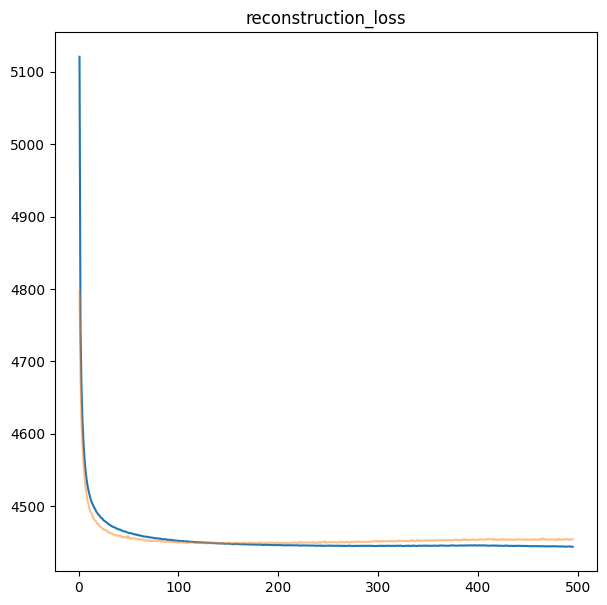

In [28]:


l_train='reconstruction_loss_train'
epochs_detail_plot=500
model=scvi_model

l_val = l_train.replace("_train", "_validation")
l_name = l_train.replace("_train", "")
# Change idx of epochs to start with 1
l_val_values = model.history[l_val].copy()
l_val_values.index = l_val_values.index + 1
l_train_values = model.history[l_train].copy()
l_train_values.index = l_train_values.index + 1
for l_values, c, alpha, dp in [
    (l_train_values, "tab:blue", 1, epochs_detail_plot),
    (l_val_values, "tab:orange", 0.5, epochs_detail_plot),
]:
    plt.plot(l_values.index, l_values.values.ravel(), c=c, alpha=alpha)
    plt.title(l_name)
    plt.plot(l_values.index[dp:], l_values.values.ravel()[dp:], c=c, alpha=alpha)


In [29]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation()

In [30]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3, spread=1.5)

Epoch 1/1000:   0%|          | 0/1000 [08:58<?, ?it/s]


In [32]:
adata.obs['sample'] = adata.obs['sample_barcode'].copy()

In [37]:
pd.DataFrame(adata.obsm['X_scVI'], index = adata.obs.index).to_csv('../objects/scVI_Latent.csv')
pd.DataFrame(adata.obsm['X_umap'], index = adata.obs.index).to_csv('../objects/scVI_Latent_UMAP.csv')

# VISUALIZING TCR & BCR

In [ ]:
adata = sc.read('../objects/data_qced.h5ad')


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [42]:
adata

AnnData object with n_obs × n_vars = 71977 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Annotation_l1_colors', 'Annotation_l2_colors', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'lei

In [43]:
adata.obsm['X_scVI'] = pd.read_csv('../objects/scVI_Latent.csv', index_col=0)
adata.obsm['X_umap'] = pd.read_csv('../objects/scVI_Latent_UMAP.csv', index_col=0)

In [51]:
adata.obsm['X_umap'] = adata.obsm['X_umap'].values

In [39]:
import muon as mu
mdata = mu.read('../objects/mdata_raw.h5mu')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [45]:
mdata = mu.MuData({'gex':adata,'airr_tcr':mdata['airr_tcr'],'airr_bcr':mdata['airr_bcr']})

mdata

MuData object with n_obs × n_vars = 74748 × 25760
  3 modalities
    gex:	71977 x 25760
      obs:	'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'Annotation_l1_colors', 'Annotation_l2_colors', 'hvg', 'leiden', 'leiden_0.1', 'leiden_0.15', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
      obsm:	'X_Harmony', 'X_Harmony_scaled', 'X_pca', 'X_umap', 'X_umap_Harmony', 'X_umap_Harmony_scaled', 'X_umap_RAW', 'X_umap_RAW_scaled', 'X_scVI'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr_tcr:	22938 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source'
      obsm:	'airr'
    airr_bcr:	12252 x 0
      obs:	'library', 'sample_barcode', 'sample_name', 'source'
      obsm:	'airr'

In [81]:
mdata.write('../objects/mdata.h5mu', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


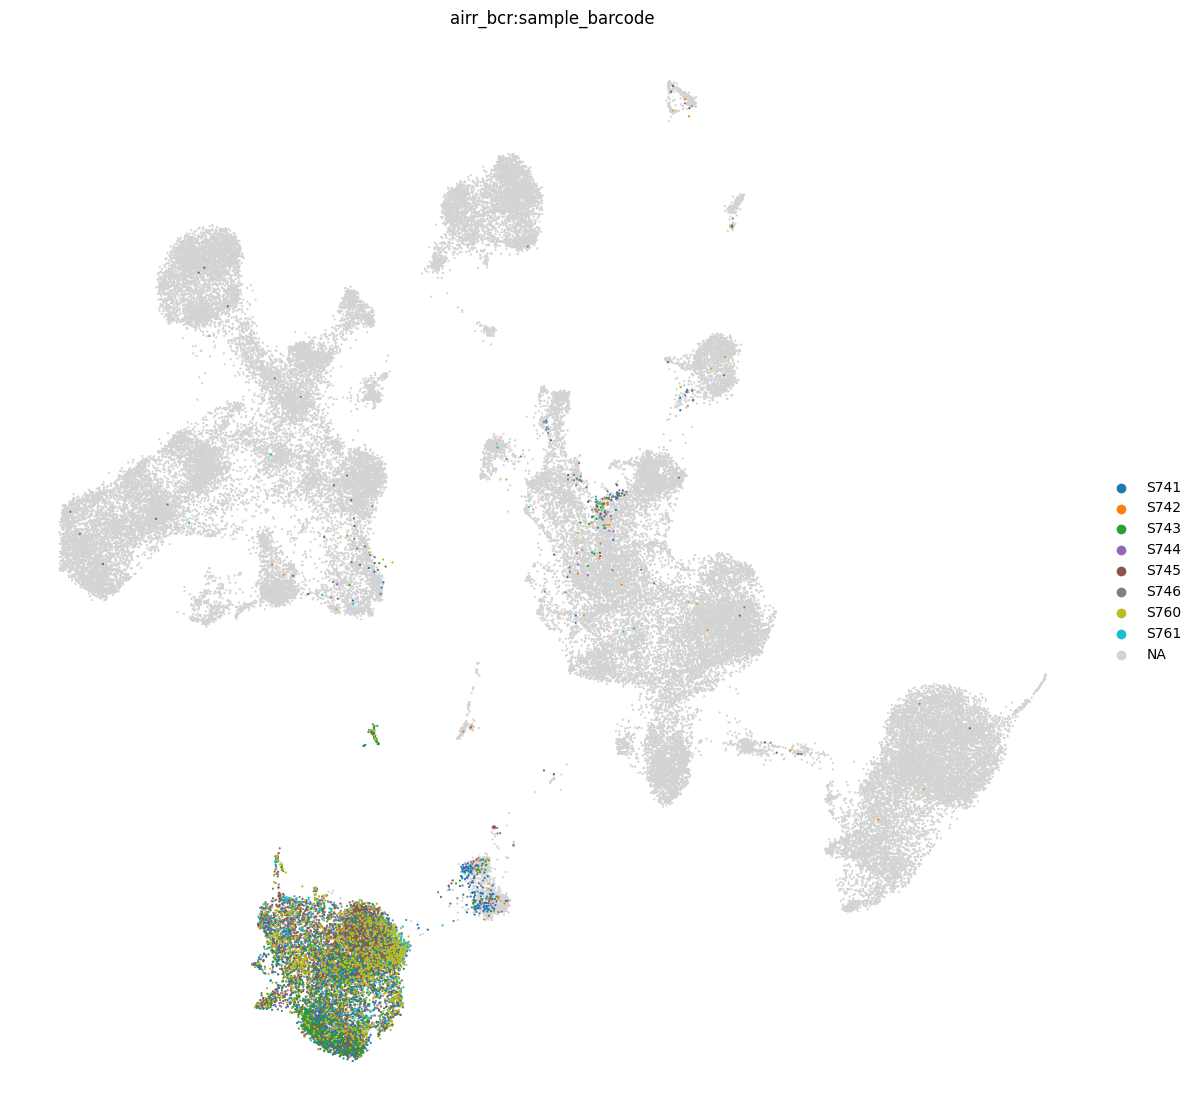

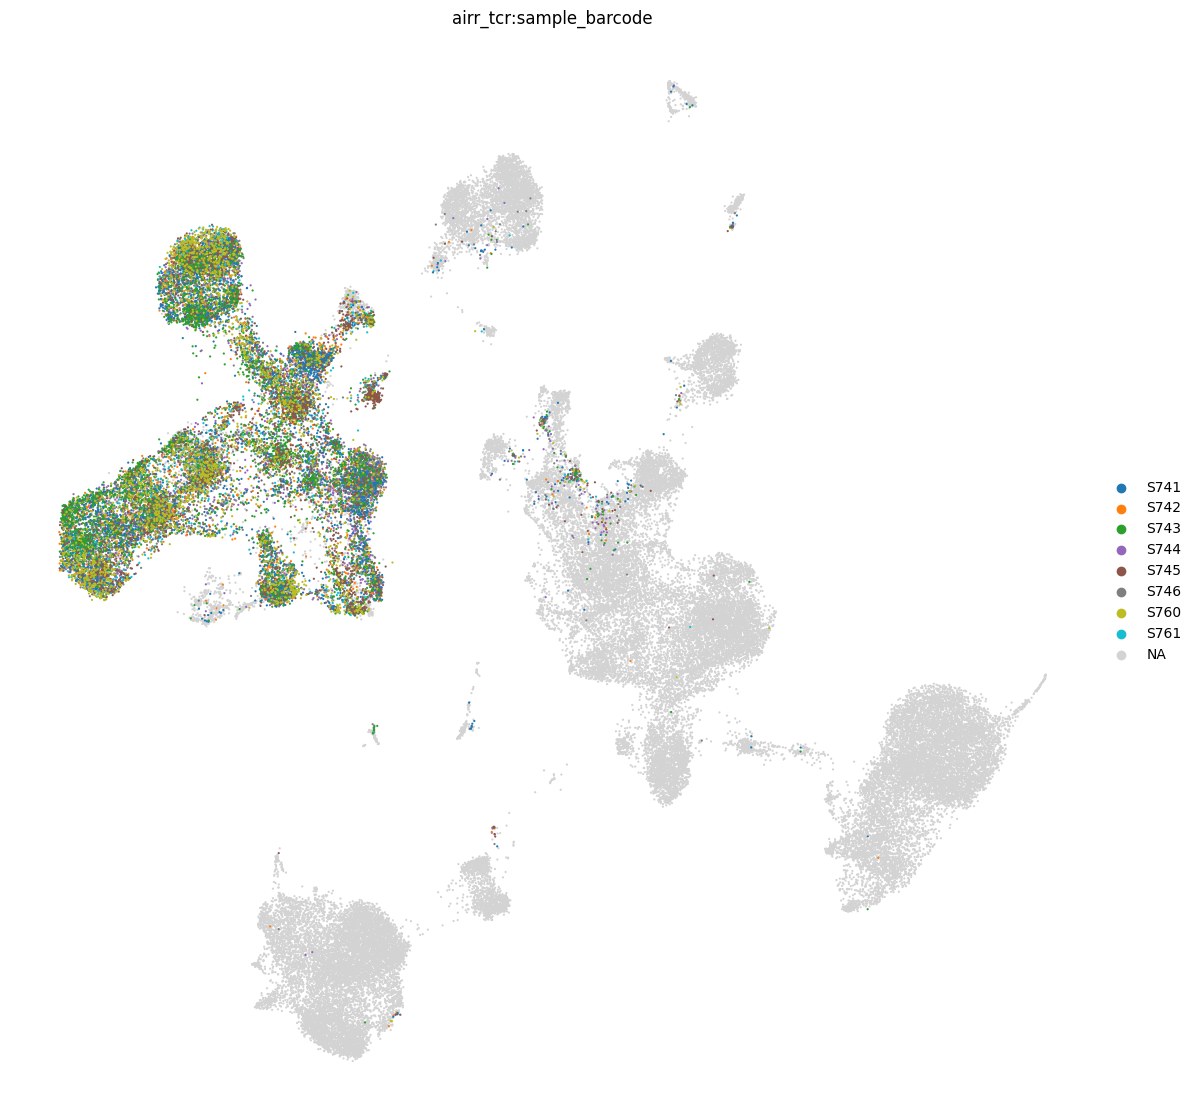

In [ ]:
rcParams['figure.figsize'] = (14,14)

mu.pl.embedding(
    mdata,basis='gex:umap',
    color=['airr_bcr:sample_barcode'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='medium',
    size=10,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False,palette = 'tab10'
)
plt.savefig('../figures/UMAP_scVI_BCR.png', bbox_inches='tight', dpi=400)
rcParams['figure.figsize'] = (14,14)

mu.pl.embedding(
    mdata,basis='gex:umap',
    color=['airr_tcr:sample_barcode'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='medium',
    size=10,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False, palette = 'tab10'
)
plt.savefig('../figures/UMAP_scVI_TCR.png', bbox_inches='tight', dpi=400)

# RE-ANNOTATING

In [1]:
import scirpy as ir
import scvi
import pandas as pd
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
from harmonypy import run_harmony
import muon as mu

In [2]:
mdata = mu.read('../objects/mdata.h5mu')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [4]:
adata = mdata['gex']

In [5]:
sc.pp.neighbors(adata, use_rep='X_scVI', n_neighbors=15)

In [6]:
sc.tl.leiden(adata)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Annotation_l2'}, xlabel='UMAP1', ylabel='UMAP2'>]

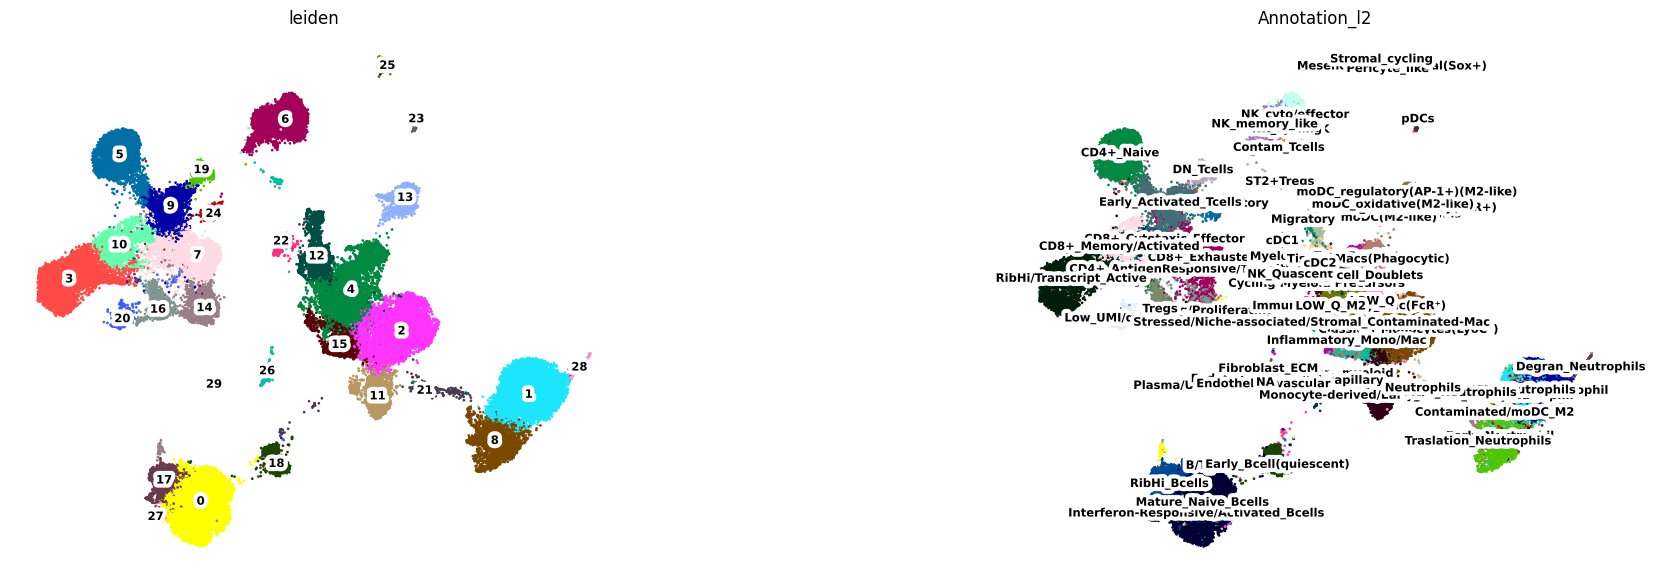

In [9]:
sc.pl.umap(
    adata,
    color=['leiden','Annotation_l2'],
    # increase horizontal space between panels
    wspace=0.5,legend_loc='on data',legend_fontsize='small', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False
)

In [13]:
adata.X= adata.layers['counts'].copy()

In [14]:
adata.X.data

array([1., 1., 1., ..., 1., 2., 1.], dtype=float32)

In [ ]:
sc.pp.normalize_total(adata, target_sum=10e4)
sc.pp.log1p(adata)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


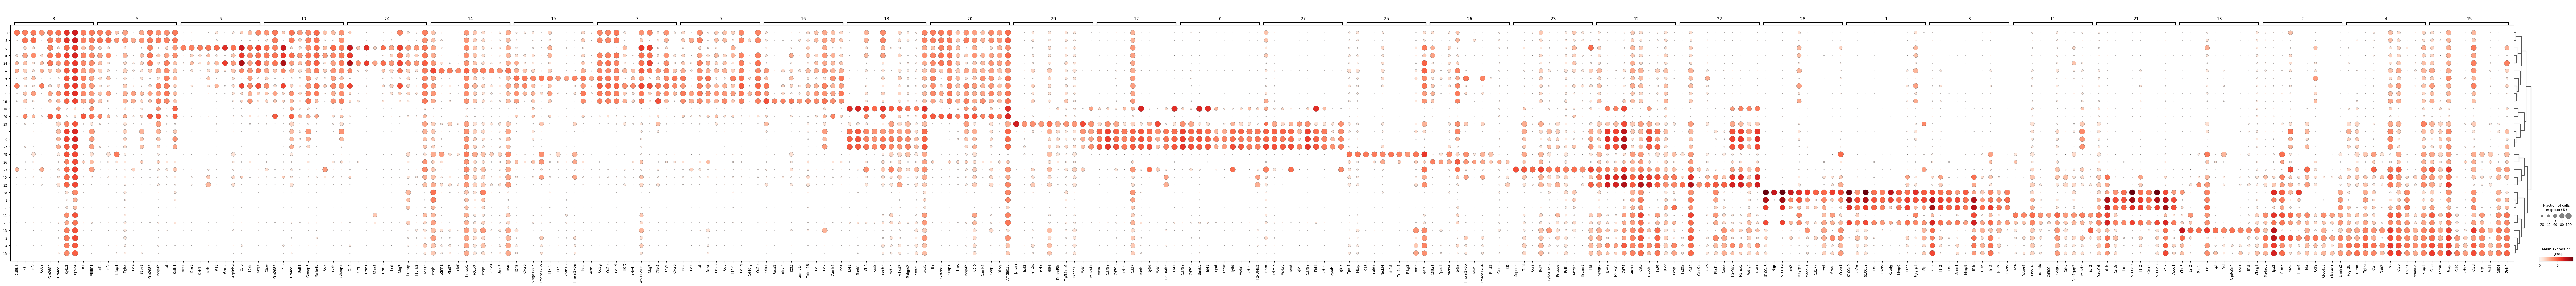

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names","scores","pvals","logfoldchanges"]
    }
).to_csv('../objects/Multi/Markers_GLOBAL_leiden1.csv')


In [ ]:

sc.pl.rank_genes_groups_dotplot(adata,use_raw=False, show=False)
plt.savefig('../figures/Multi/Global_leiden_dotplot.png', bbox_inches='tight')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

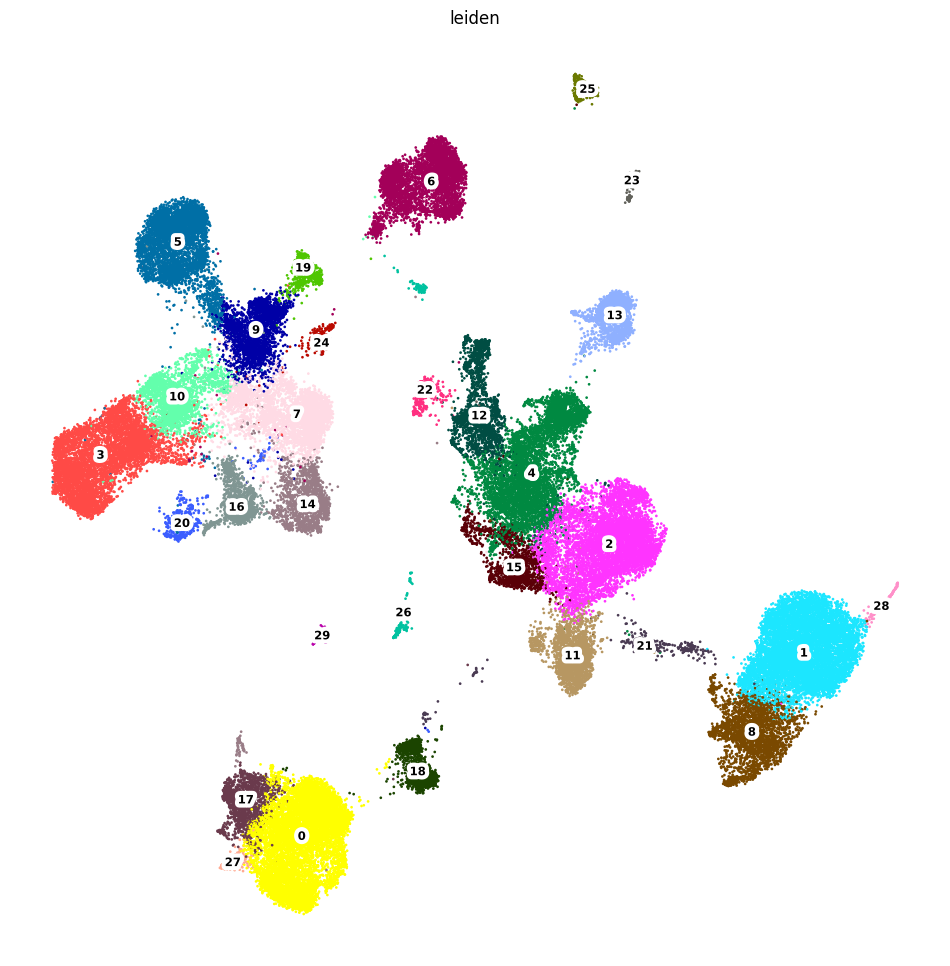

In [22]:
rcParams['figure.figsize'] = (12,12)

sc.pl.umap(
    adata,
    color=['leiden'],
    # increase horizontal space between panels
    wspace=0.5,legend_loc='on data',legend_fontsize='small', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False
)

In [63]:
adata.write('../objects/adata_leiden.h5ad', compression='gzip')

In [2]:
adata = sc.read('../objects/adata_leiden.h5ad')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata.obs['Annotation']=''
adata.obs.loc[adata.obs['leiden'].isin(['0']),'Annotation'] = 'B'
adata.obs.loc[adata.obs['leiden'].isin(['1']),'Annotation'] = 'Neutro'
adata.obs.loc[adata.obs['leiden'].isin(['2']),'Annotation'] = 'Classical_Monocytes'
adata.obs.loc[adata.obs['leiden'].isin(['3']),'Annotation'] = 'CD8+_HiRib_T'
adata.obs.loc[adata.obs['leiden'].isin(['4']),'Annotation'] = 'M2_Macs'
adata.obs.loc[adata.obs['leiden'].isin(['5']),'Annotation'] = 'CD4+_T'
adata.obs.loc[adata.obs['leiden'].isin(['6']),'Annotation'] = 'NK'
adata.obs.loc[adata.obs['leiden'].isin(['7']),'Annotation'] = 'CD8+_Act_Exh_T'
adata.obs.loc[adata.obs['leiden'].isin(['8']),'Annotation'] = 'Inflam_Mono/Neutro(TAN)'
adata.obs.loc[adata.obs['leiden'].isin(['9']),'Annotation'] = 'CD4+_T'
adata.obs.loc[adata.obs['leiden'].isin(['10']),'Annotation'] = 'Stem/Memory_Signal_T'
adata.obs.loc[adata.obs['leiden'].isin(['11']),'Annotation'] = 'Macs(TAM)_1'
adata.obs.loc[adata.obs['leiden'].isin(['12']),'Annotation'] = 'DC(moDCs)'
adata.obs.loc[adata.obs['leiden'].isin(['13']),'Annotation'] = 'Macs(TAM)_2'
adata.obs.loc[adata.obs['leiden'].isin(['14']),'Annotation'] = 'Proli'
adata.obs.loc[adata.obs['leiden'].isin(['15']),'Annotation'] = 'Macs(TAM)_3'
adata.obs.loc[adata.obs['leiden'].isin(['16']),'Annotation'] = 'CD4+_Treg'
adata.obs.loc[adata.obs['leiden'].isin(['17']),'Annotation'] = 'B'
adata.obs.loc[adata.obs['leiden'].isin(['18']),'Annotation'] = 'B(Early)'
adata.obs.loc[adata.obs['leiden'].isin(['19']),'Annotation'] = 'Gamma_Delta_CD4+_mix(DOsubset)'
adata.obs.loc[adata.obs['leiden'].isin(['20']),'Annotation'] = '(Unconventional)T'
adata.obs.loc[adata.obs['leiden'].isin(['21']),'Annotation'] = 'Neutro(TAN)'
adata.obs.loc[adata.obs['leiden'].isin(['22']),'Annotation'] = 'DC(cDC1)'
adata.obs.loc[adata.obs['leiden'].isin(['23']),'Annotation'] = 'pDCs'
adata.obs.loc[adata.obs['leiden'].isin(['24']),'Annotation'] = 'CD8+_Cyto_T'
adata.obs.loc[adata.obs['leiden'].isin(['25']),'Annotation'] = '(CAF-EMT)'# Cancer associated Fibros -- Tumor Epi Transitioning to mesen
adata.obs.loc[adata.obs['leiden'].isin(['26']),'Annotation'] = '(TAV)'
adata.obs.loc[adata.obs['leiden'].isin(['27']),'Annotation'] = 'B'
adata.obs.loc[adata.obs['leiden'].isin(['28']),'Annotation'] = 'Neutro(TIN)'
adata.obs.loc[adata.obs['leiden'].isin(['29']),'Annotation'] = 'Plasma'

In [2]:
import pandas as pd

# Define mapping from leiden to Annotation
leiden_to_annotation = {
    '0': 'B',
    '1': 'Neutro',
    '2': 'Classical_Monocytes',
    '3': 'CD8+_HiRib_T',
    '4': 'M2_Macs',
    '5': 'CD4+_T',
    '6': 'NK',
    '7': 'CD8+_Act_Exh_T',
    '8': 'Inflam_Mono/Neutro(TAN)',
    '9': 'CD4+_T',
    '10': 'Stem/Memory_Signal_T',
    '11': 'Macs(TAM)_1',
    '12': 'DC(moDCs)',
    '13': 'Macs(TAM)_2',
    '14': 'Proli',
    '15': 'Macs(TAM)_3',
    '16': 'CD4+_Treg',
    '17': 'B',
    '18': 'B(Early)',
    '19': 'Gamma_Delta_CD4+_mix(DOsubset)',
    '20': '(Unconventional)T',
    '21': 'Neutro(TAN)',
    '22': 'DC(cDC1)',
    '23': 'pDCs',
    '24': 'CD8+_Cyto_T',
    '25': '(CAF-EMT)',
    '26': '(TAV)',
    '27': 'B',
    '28': 'Neutro(TIN)',
    '29': 'Plasma'
}

# Convert to DataFrame
df = pd.DataFrame(list(leiden_to_annotation.items()), columns=['leiden', 'Annotation'])

# Save to CSV
csv_path = "../../share/leiden_annotation_mapping.csv"
df.to_csv(csv_path, index=False)

csv_path

'../../share/leiden_annotation_mapping.csv'

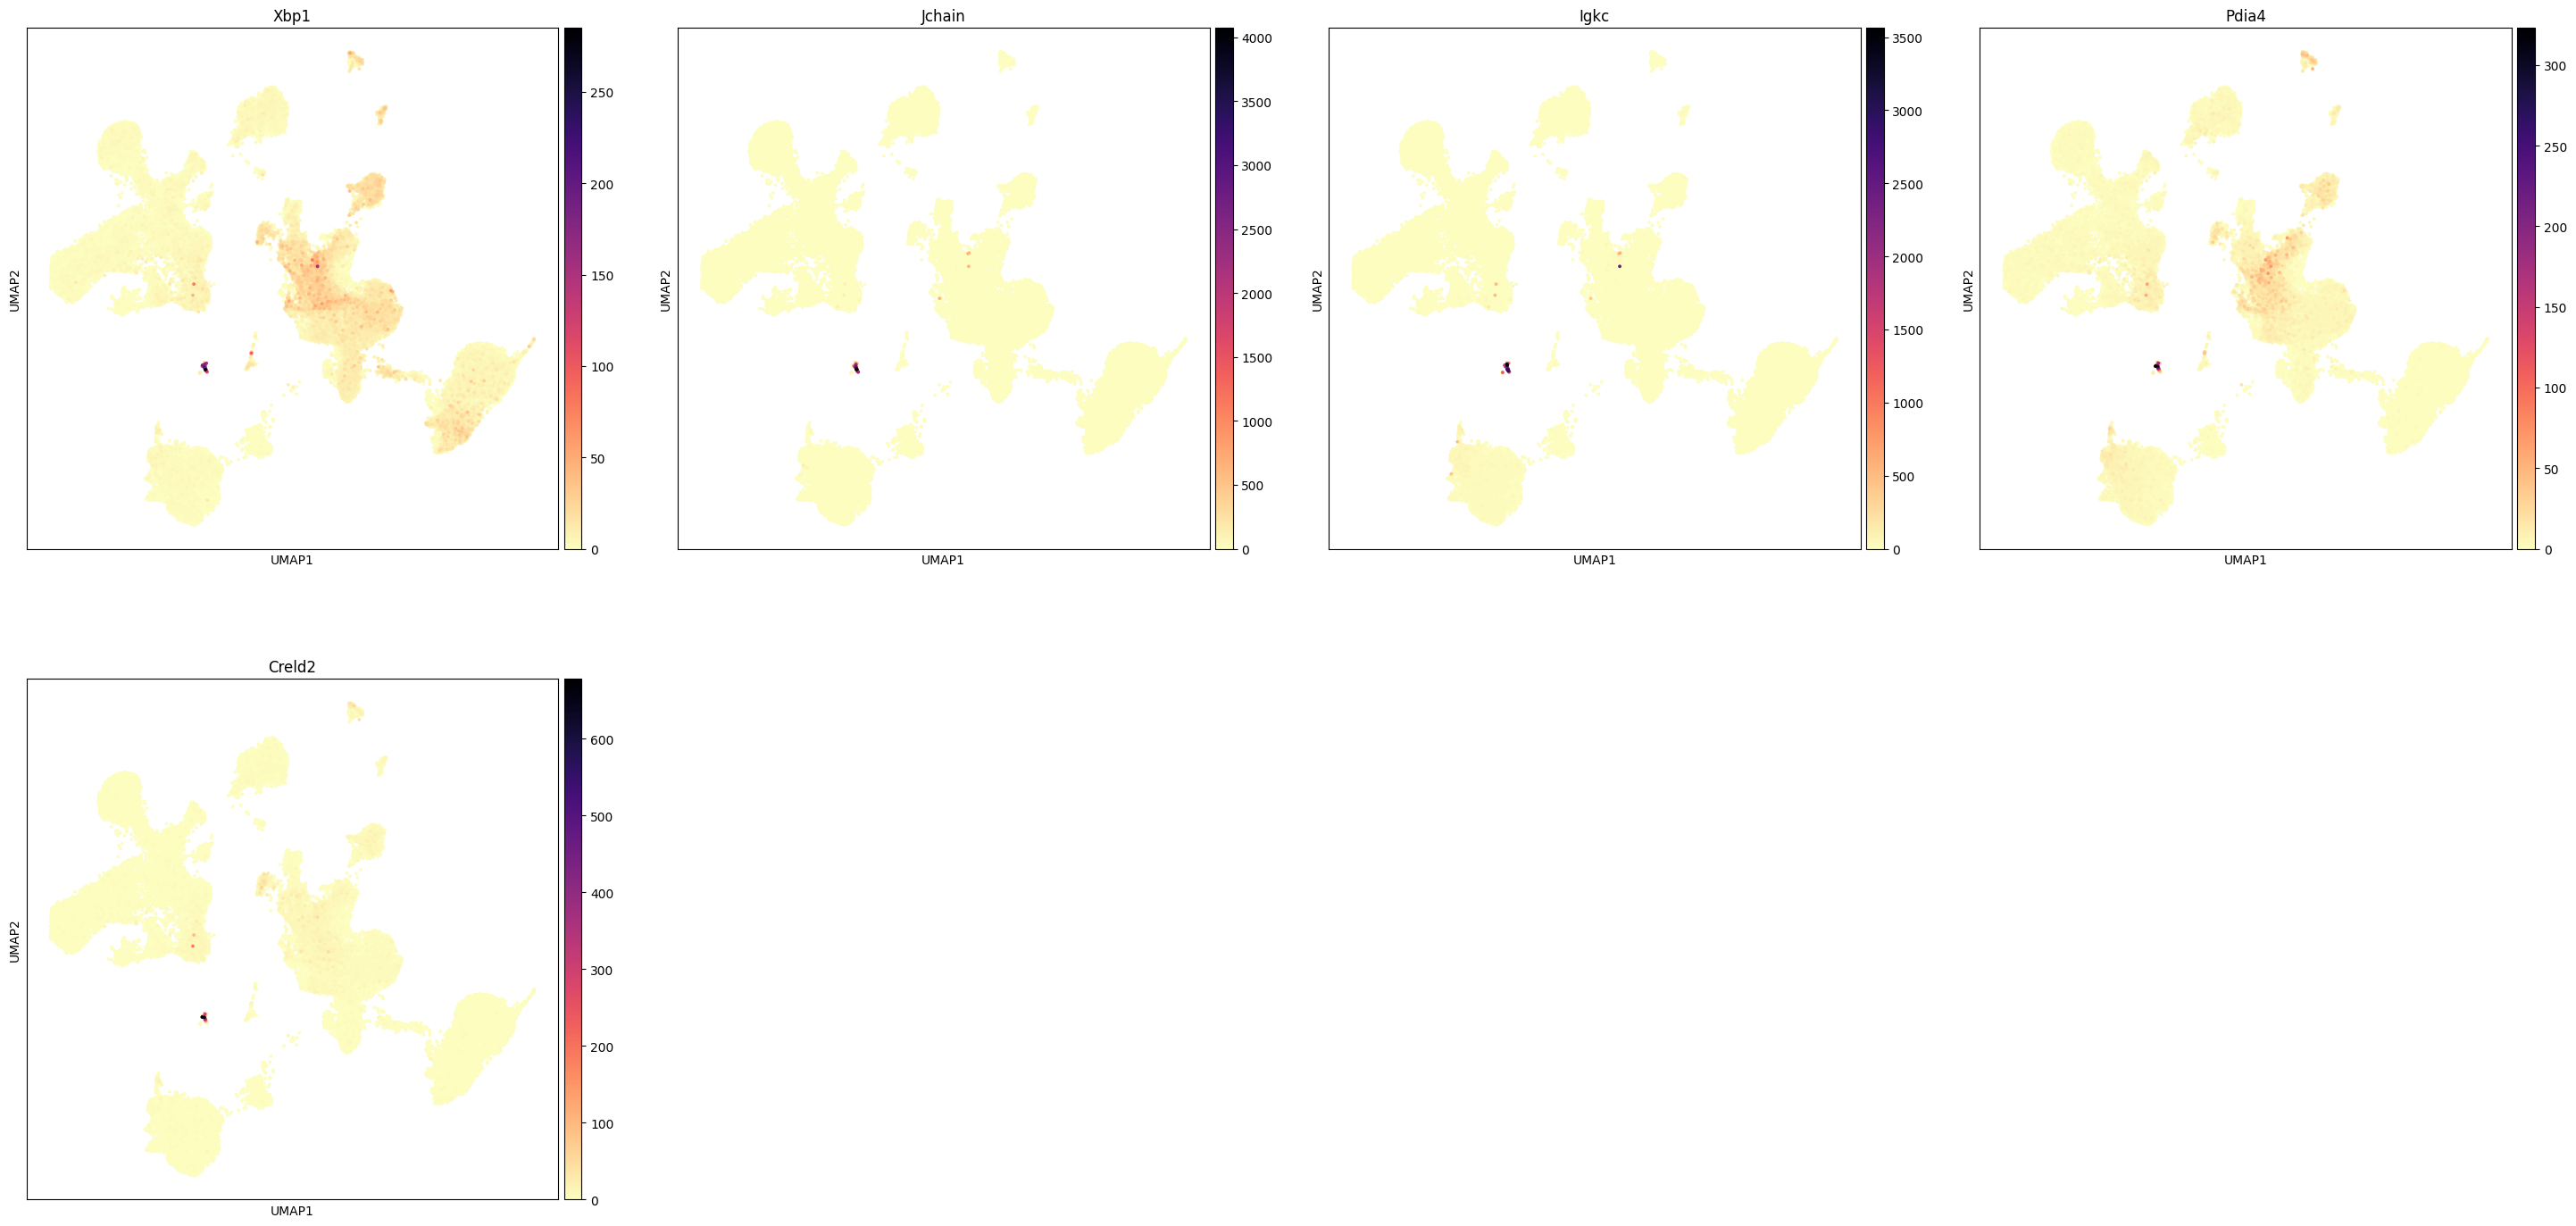

In [67]:
sc.pl.umap(adata, color=["Xbp1", "Jchain", "Igkc", "Pdia4", "Creld2"], size=30, cmap='magma_r')


## SUBCLUSTER TAM

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


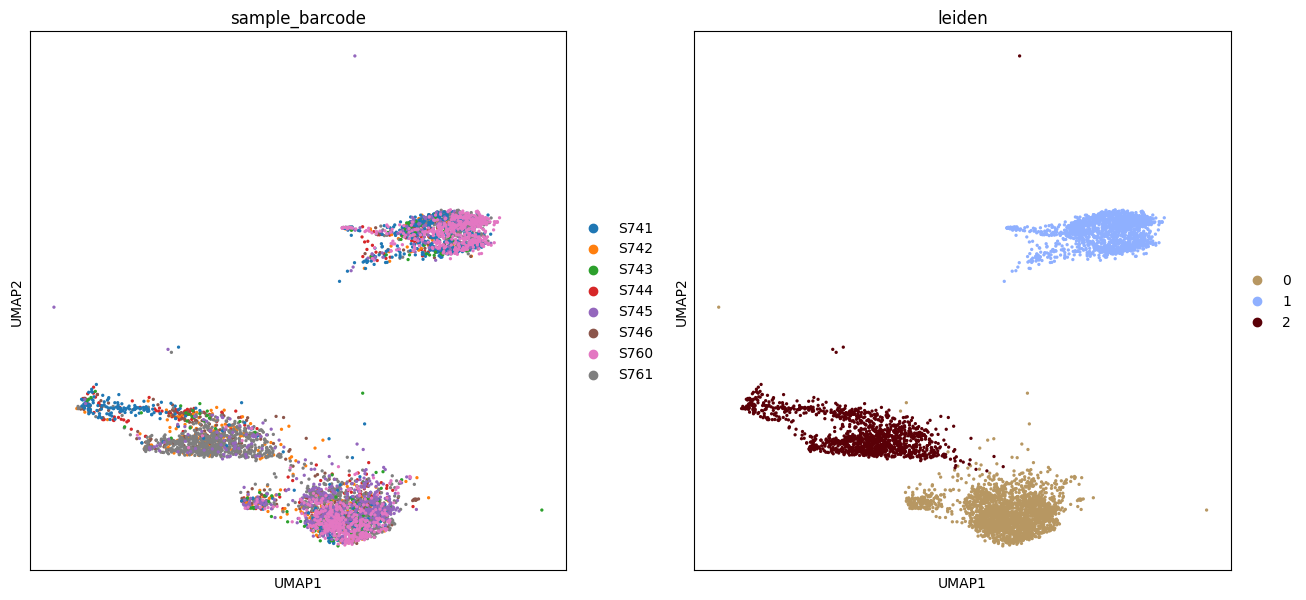

In [4]:
adata_sub = adata[adata.obs['leiden'].isin(['11','13','15'])].copy()
sc.tl.leiden(adata_sub, resolution=0.2)
sc.pl.umap(adata_sub, color=['sample_barcode','leiden']) 

In [97]:
adata.X.data

array([2.4838898, 2.4838898, 2.4838898, ..., 2.8429036, 3.50649  ,
       2.8429036], dtype=float32)

In [98]:
sc.tl.rank_genes_groups(adata_sub, 'leiden', method='wilcoxon', use_raw=False)
result = adata_sub.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names","scores","pvals","logfoldchanges"]
    }
).to_csv('../objects/Multi/Markers_subcluster_TAM.csv')

# SUBCLUSTER 19

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


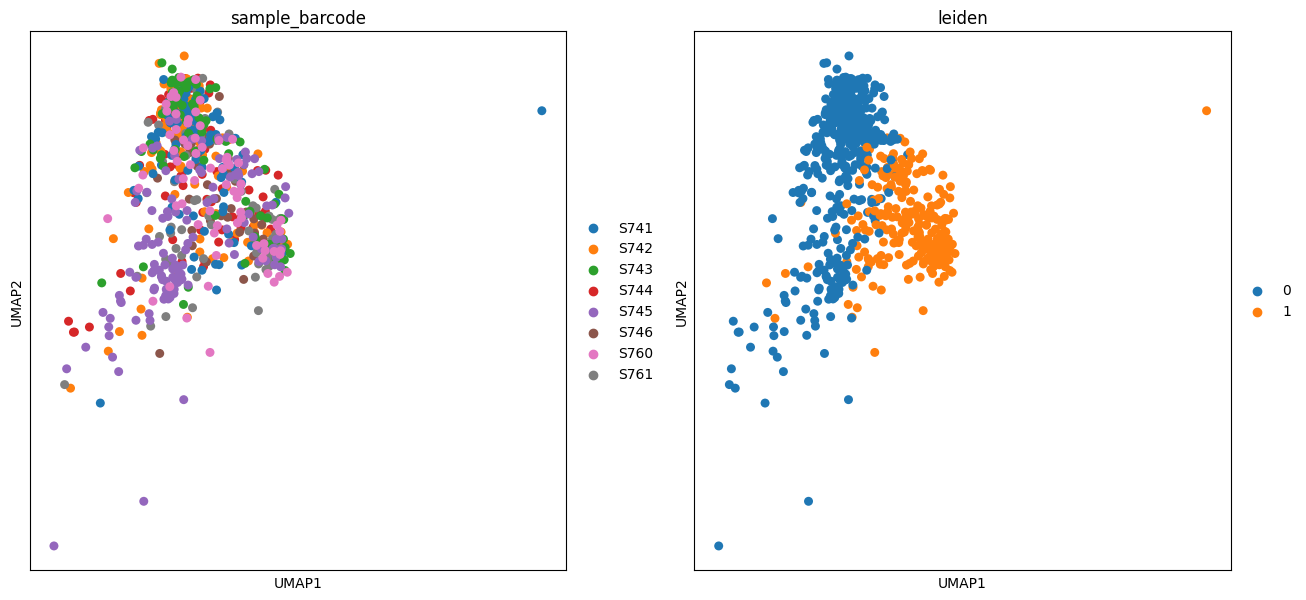

In [5]:
adata_sub = adata[adata.obs['leiden'].isin(['19'])].copy()
sc.tl.leiden(adata_sub, resolution=0.2)
sc.pl.umap(adata_sub, color=['sample_barcode','leiden']) 

In [ ]:
sc.tl.rank_genes_groups(adata_sub, 'leiden', method='wilcoxon')
result = adata_sub.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names","scores","pvals","logfoldchanges"]
    }
).to_csv('../objects/Multi/Markers_subcluster_19.csv')

In [6]:
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['0'])].obs.index,'Annotation'] = 'γδ_T'
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['1'])].obs.index,'Annotation'] = 'CD4+_T'


# SUBCLUSTER 7

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


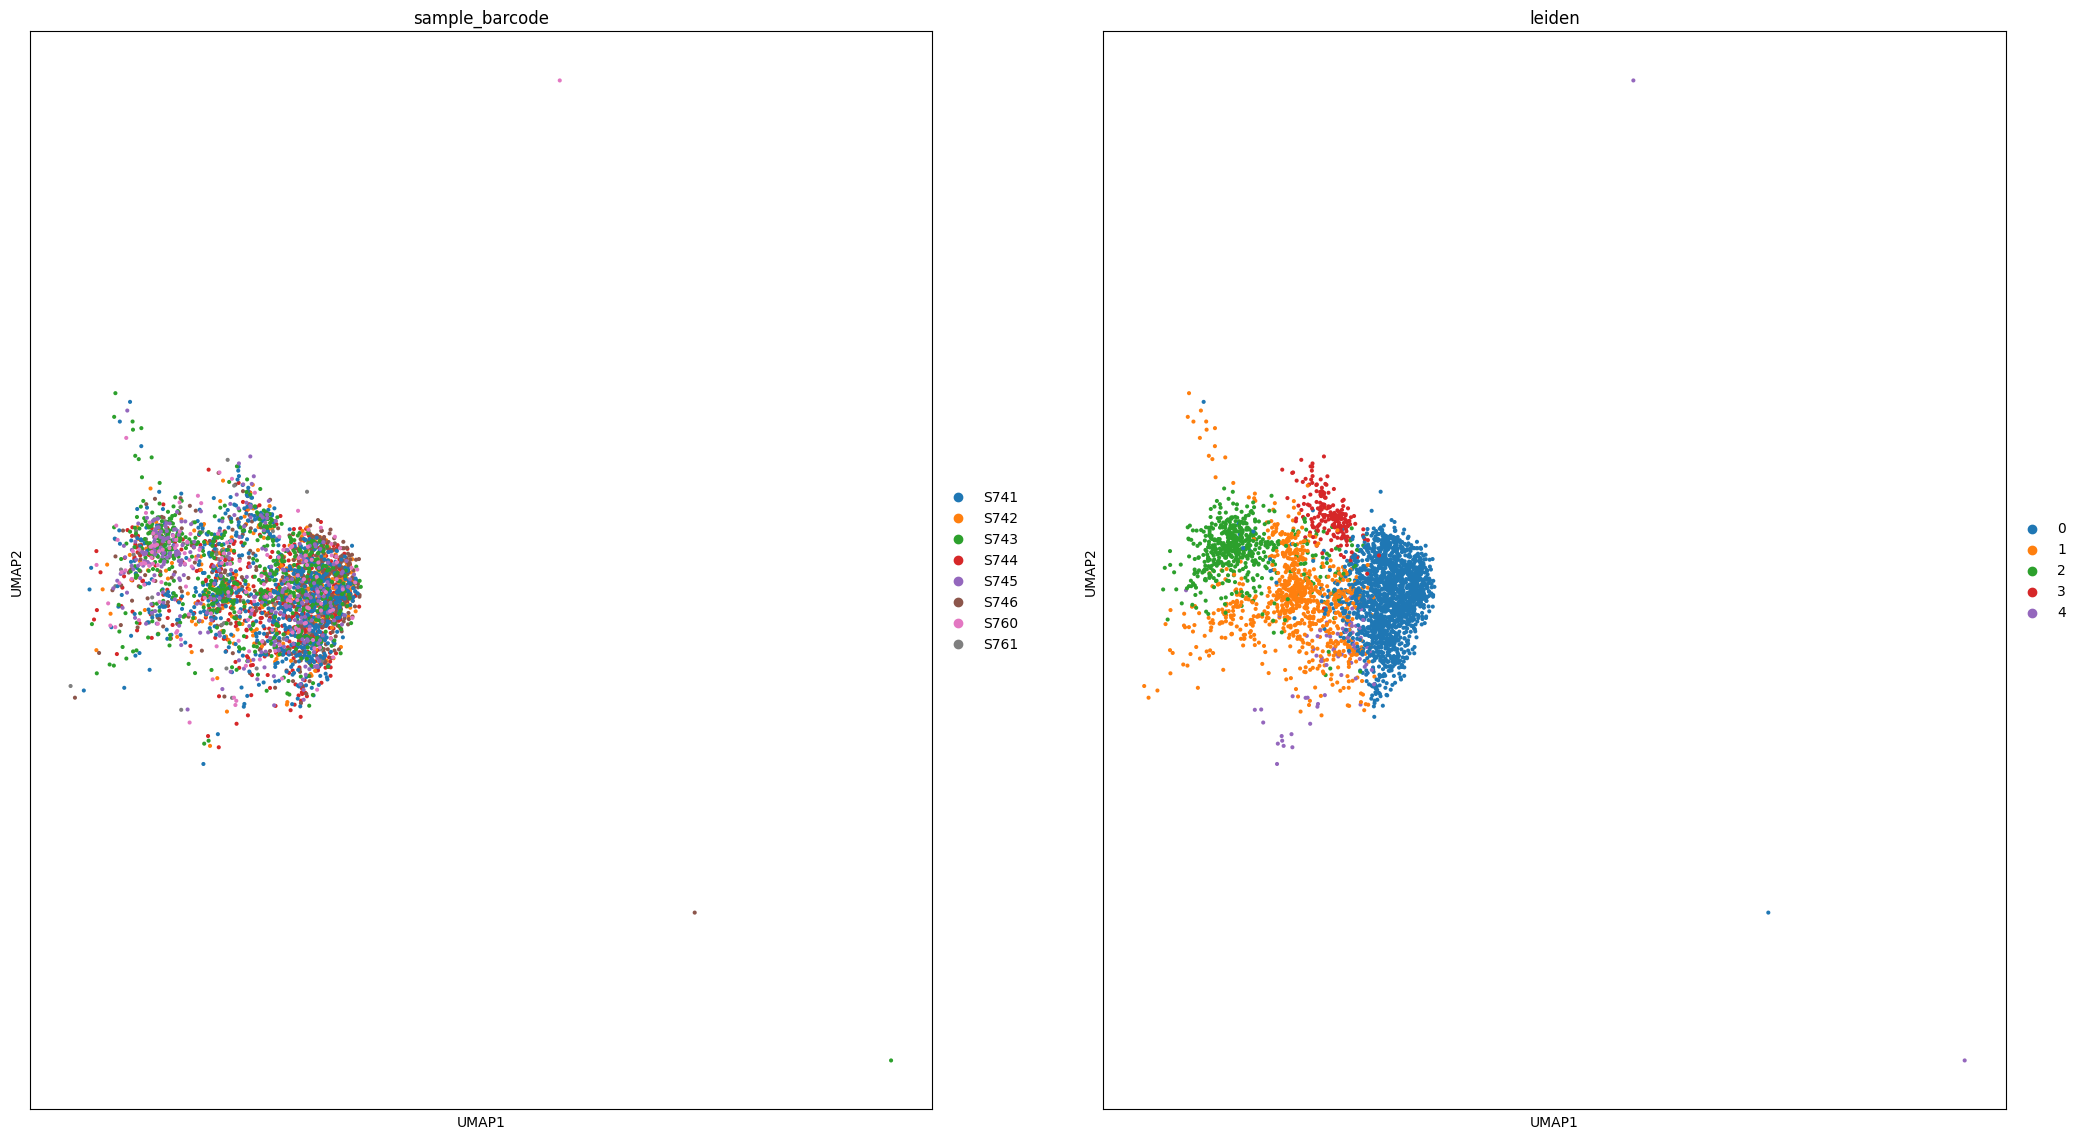

In [23]:
adata_sub = adata[adata.obs['leiden'].isin(['7'])].copy()
sc.tl.leiden(adata_sub, resolution=0.4)
sc.pl.umap(adata_sub, color=['sample_barcode','leiden']) 

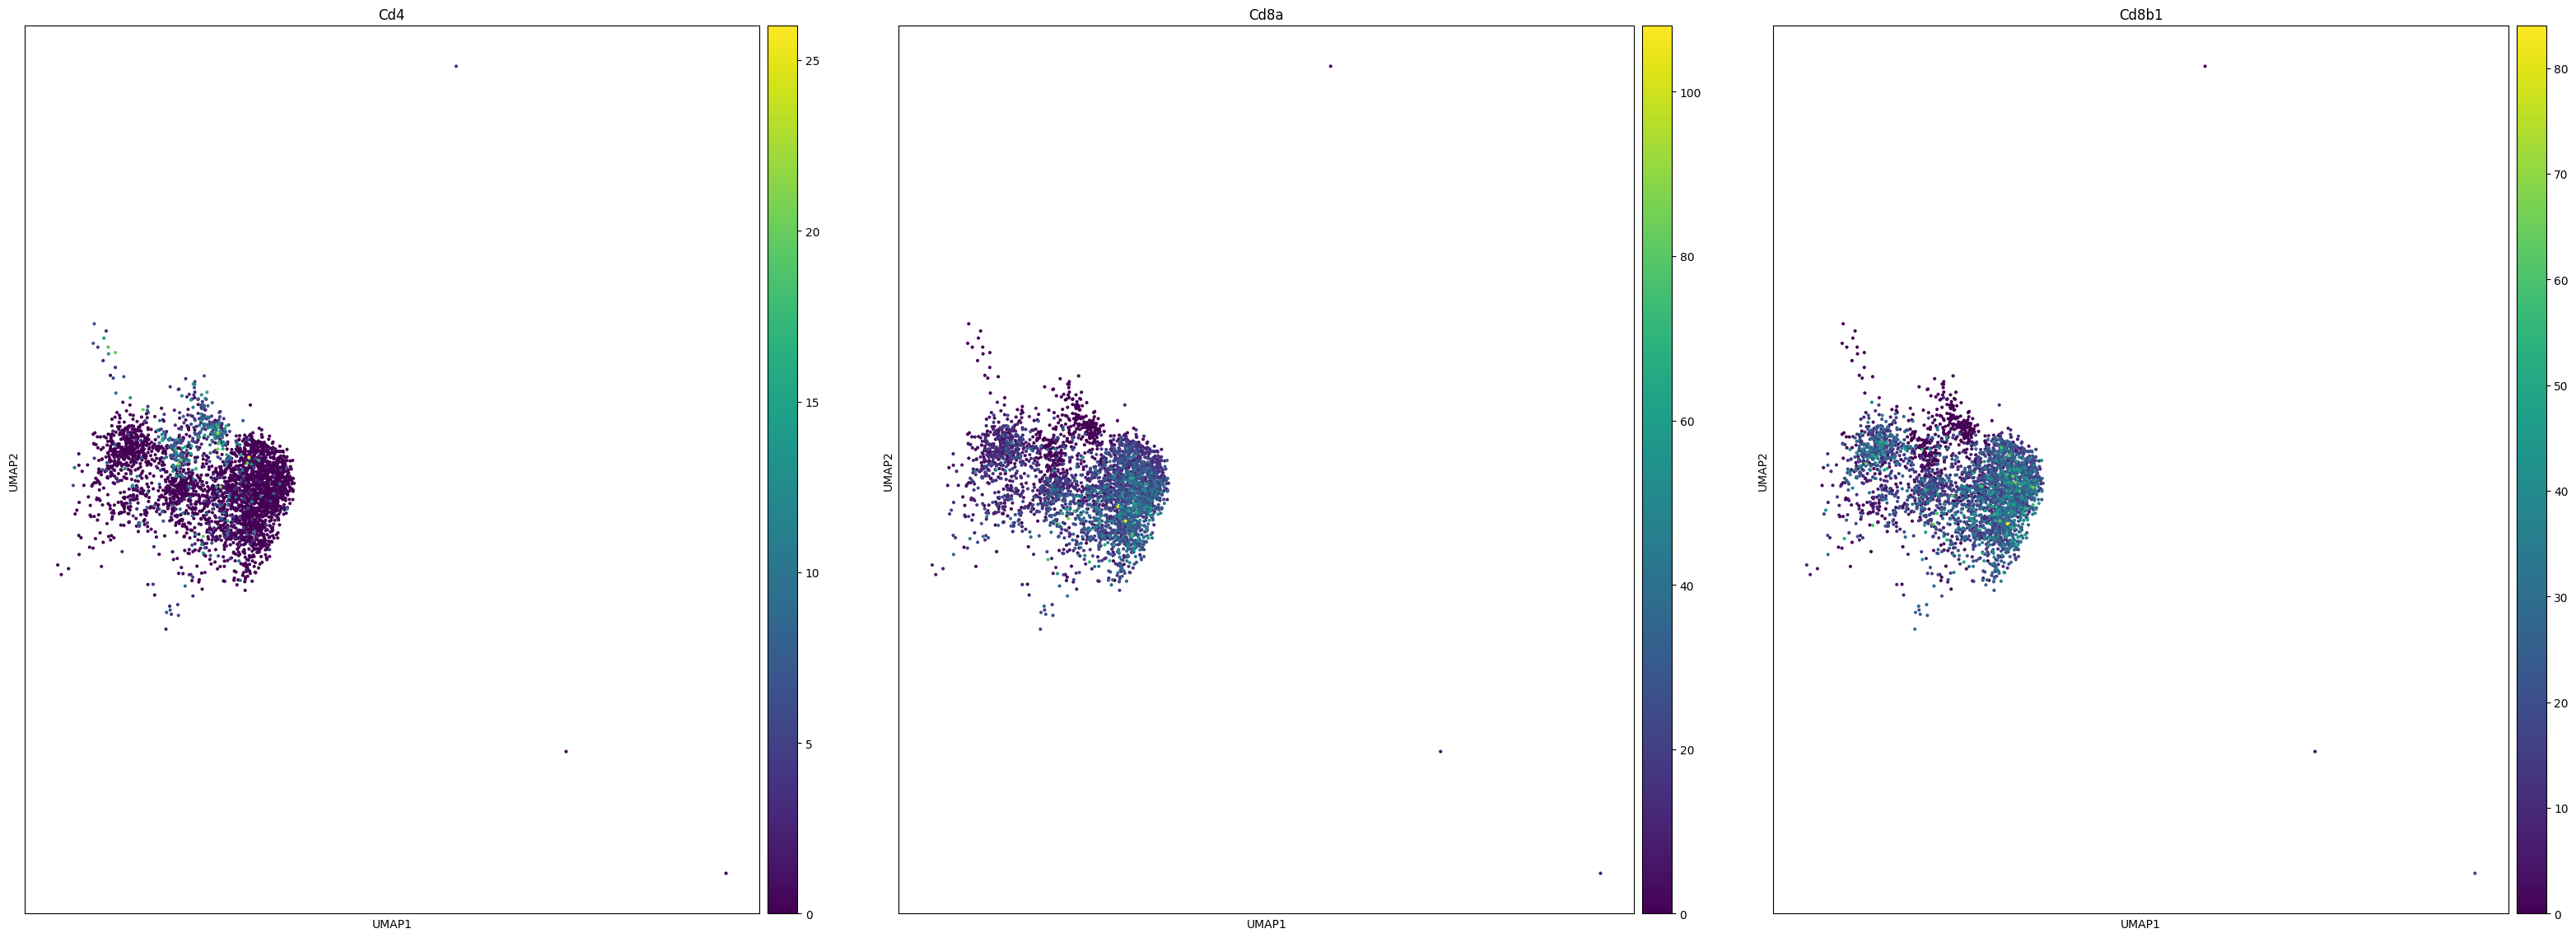

In [16]:

sc.pl.umap(adata_sub, color=['Cd4', 'Cd8a', 'Cd8b1']) 

In [24]:
adata_sub.X = adata_sub.layers['counts'].copy()
sc.pp.normalize_total(adata_sub, target_sum=10e4)
sc.pp.log1p(adata_sub)

In [25]:
sc.tl.rank_genes_groups(adata_sub, 'leiden', method='wilcoxon')
result = adata_sub.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names","scores","pvals","logfoldchanges"]
    }
).to_csv('../objects/Multi/Markers_subcluster_7.csv')

In [35]:
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()

In [36]:
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['0'])].obs.index,'Annotation'] = 'CD8+_(Term)Exh_T'
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['1'])].obs.index,'Annotation'] = 'CD8+_(Pre)Exh_T'
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['2'])].obs.index,'Annotation'] = 'CD8+_(TPEX)Exh_T' # Progenitor exausted
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['3'])].obs.index,'Annotation'] = 'CD4+_T' # Progenitor exausted
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['4'])].obs.index,'Annotation'] = 'CD8+_(Pre)Exh_T' # Progenitor exausted


# SUBCLUSTER B cell

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


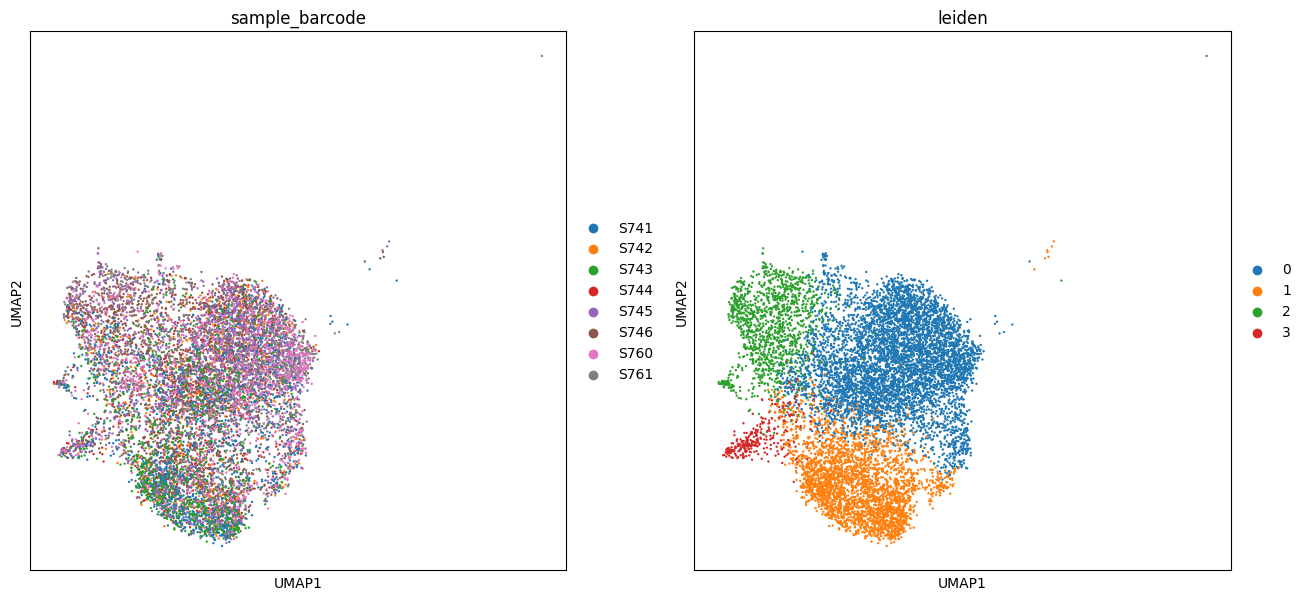

In [6]:
adata_sub = adata[adata.obs['leiden'].isin(['17','27','0'])].copy()
sc.tl.leiden(adata_sub, resolution=0.25)
sc.pl.umap(adata_sub, color=['sample_barcode','leiden']) 

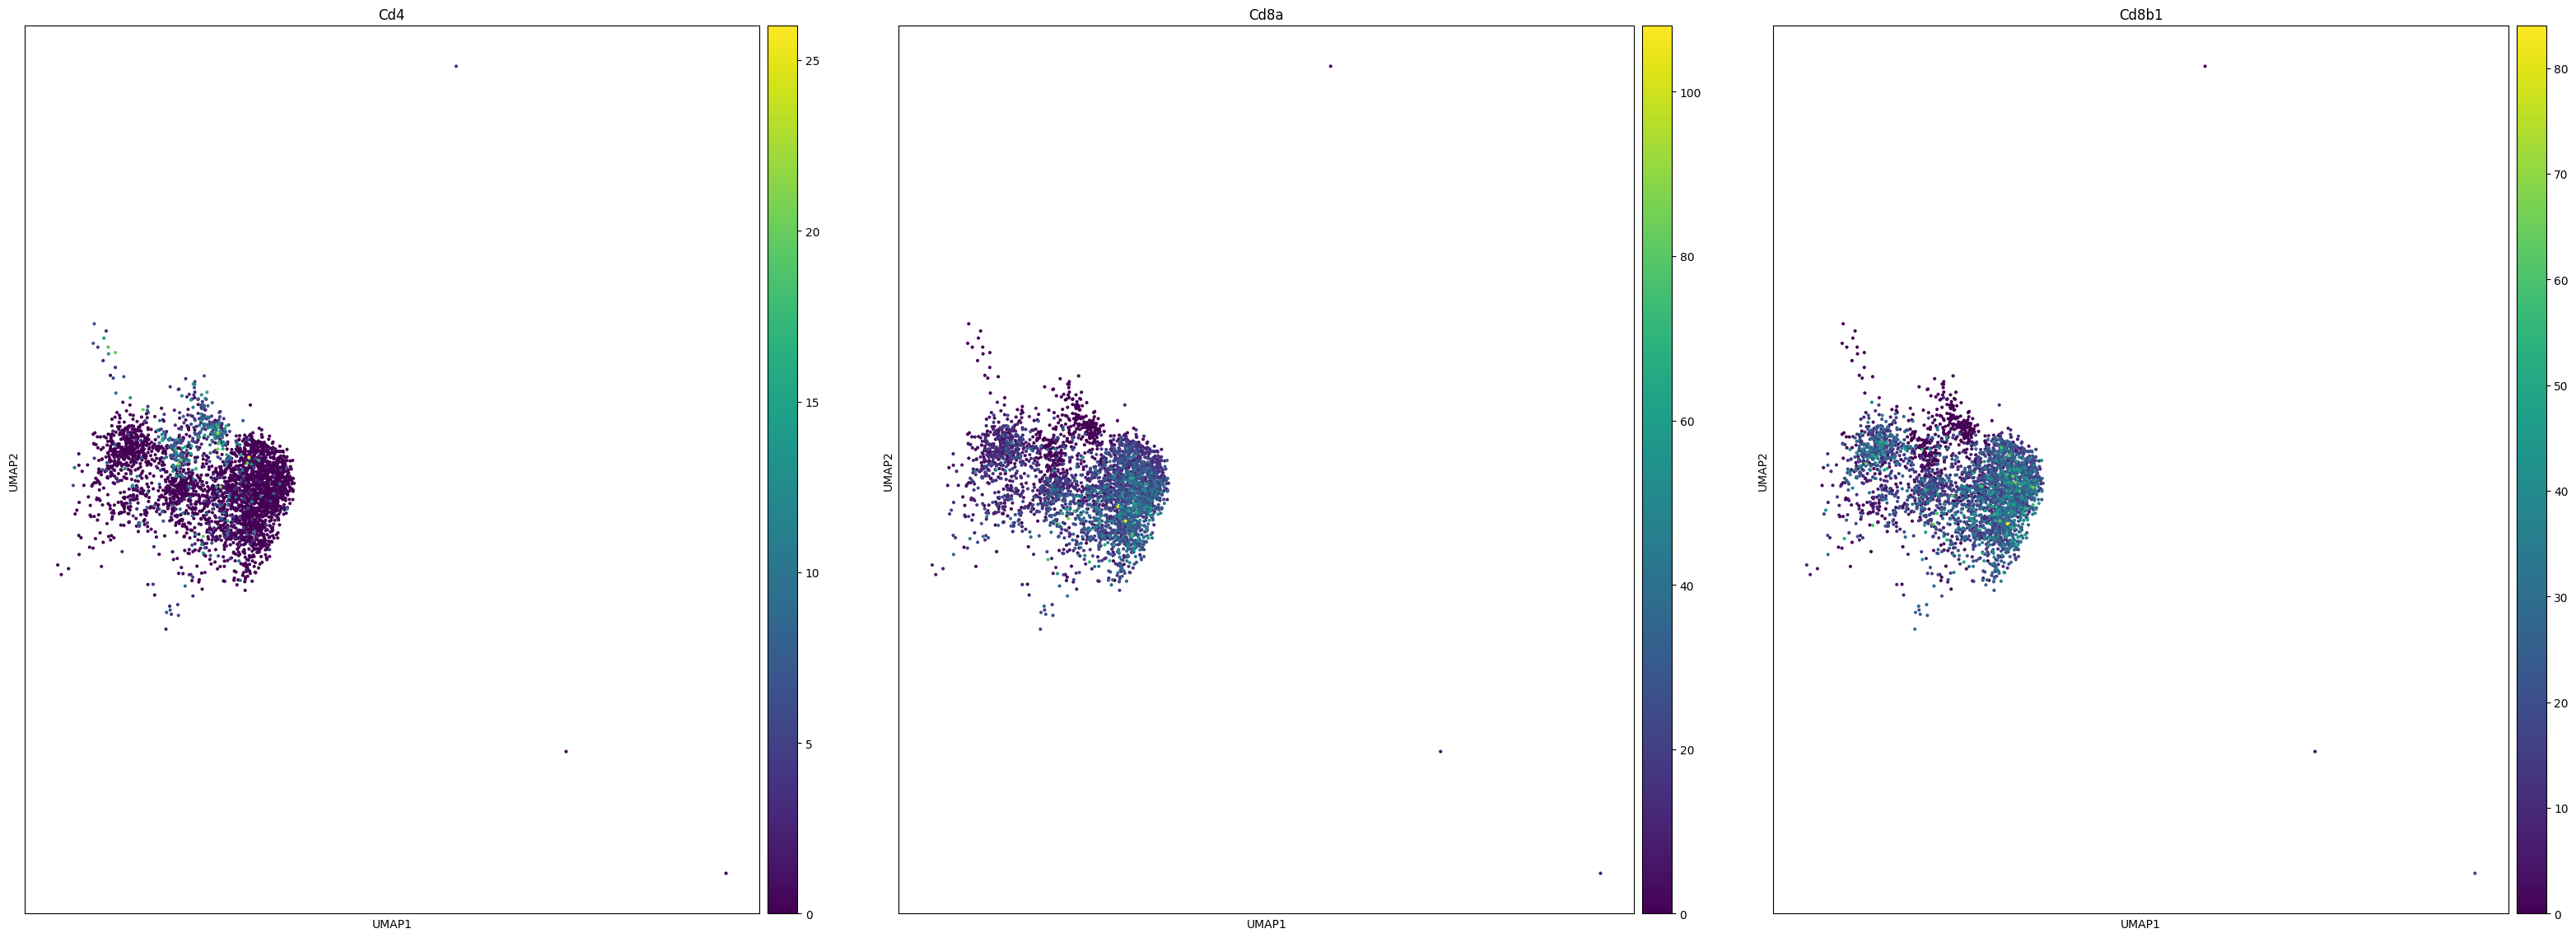

In [ ]:

sc.pl.umap(adata_sub, color=['Cd4', 'Cd8a', 'Cd8b1']) 

In [7]:
adata_sub.X = adata_sub.layers['counts'].copy()
sc.pp.normalize_total(adata_sub, target_sum=10e4)
sc.pp.log1p(adata_sub)

In [8]:
sc.tl.rank_genes_groups(adata_sub, 'leiden', method='wilcoxon')
result = adata_sub.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key}": result[key][group]
        for group in groups
        for key in ["names","scores","pvals","logfoldchanges"]
    }
).to_csv('../objects/Multi/Markers_subcluster_B_cells.csv')

In [9]:
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()

In [10]:
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['0'])].obs.index,'Annotation'] = '(Early_Act)_B'
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['1'])].obs.index,'Annotation'] = '(Naive)_B'
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['2'])].obs.index,'Annotation'] = '(HiRib)_B' # Progenitor exausted
adata.obs.loc[adata_sub[adata_sub.obs['leiden'].isin(['3'])].obs.index,'Annotation'] = '(Memory)_B' # Progenitor exausted


In [11]:
adata.obs[['Annotation']].to_csv('../objects/Multi/Updated_B_Annotation.csv')

# PLOTs and Save

In [92]:
adata.obs['Annotation_l1'].unique()

['T_cells', 'Monocytes', 'Macrophages', 'Cycling/Proliferating', 'Stromal/Mesenchymal', ..., 'NK', 'B_cells', 'pDCs', 'cDC2', 'M2/moDCs']
Length: 11
Categories (11, object): ['B_cells', 'Cycling/Proliferating', 'M2/moDCs', 'Macrophages', ..., 'Stromal/Mesenchymal', 'T_cells', 'cDC2', 'pDCs']

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Annotation_l1'}, xlabel='UMAP1', ylabel='UMAP2'>

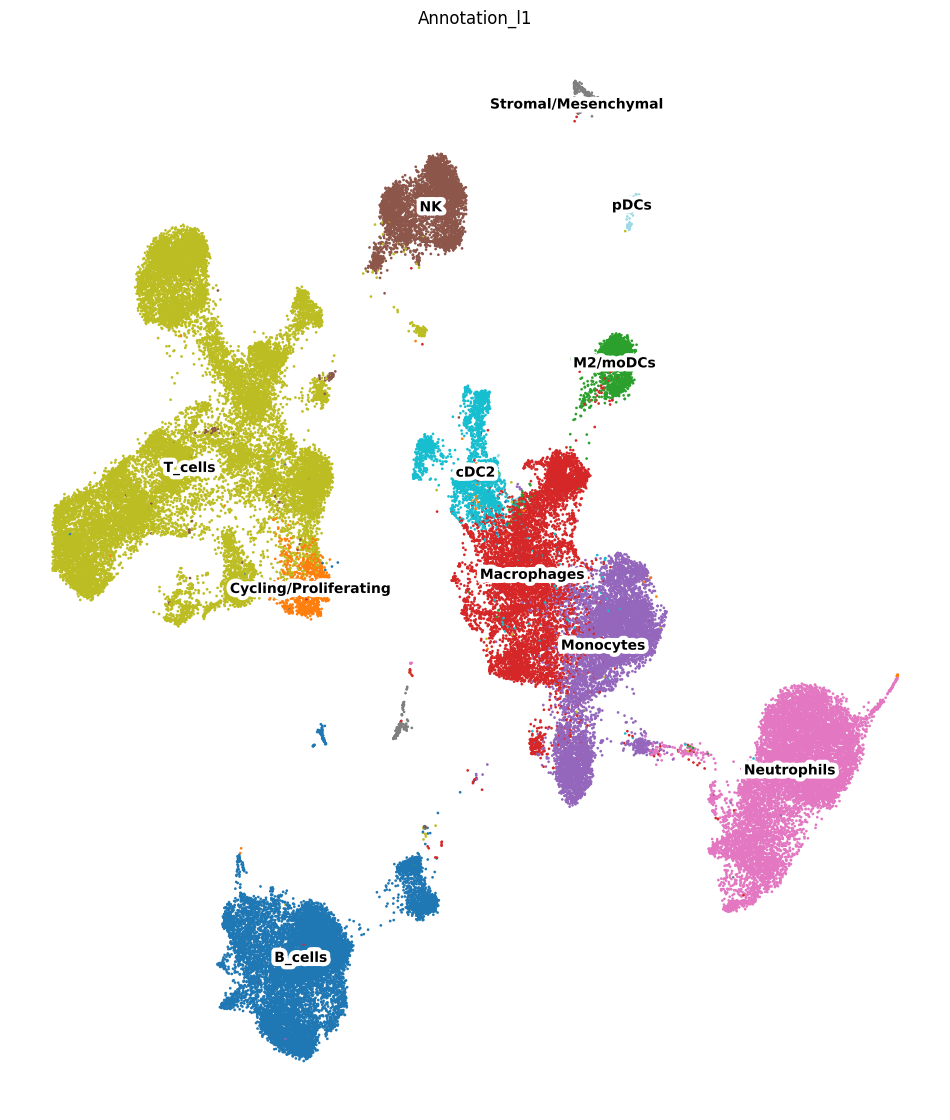

In [93]:
rcParams['figure.figsize'] = (12,14)
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()
sc.pl.umap(
    adata,
    color=['Annotation_l1'],
    # increase horizontal space between panels
    wspace=0.5,legend_loc='on data',legend_fontsize='medium', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False, palette ='tab20'
)
# plt.savefig('../figures/Multi/RNA_scVI_ANNOTATIONS.png', bbox_inches='tight', dpi=400)

In [ ]:
color_palette_30 = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#393b79", "#637939", "#8c6d31", "#843c39", "#7b4173",
    "#5254a3", "#9c9ede", "#6b6ecf", "#bd9e39", "#e7ba52",
    "#31a354", "#756bb1", "#9e9ac8", "#636363", "#d6616b",
    "#ce6dbd", "#c49c94", "#e7969c", "#a55194", "#6b486b"
]

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


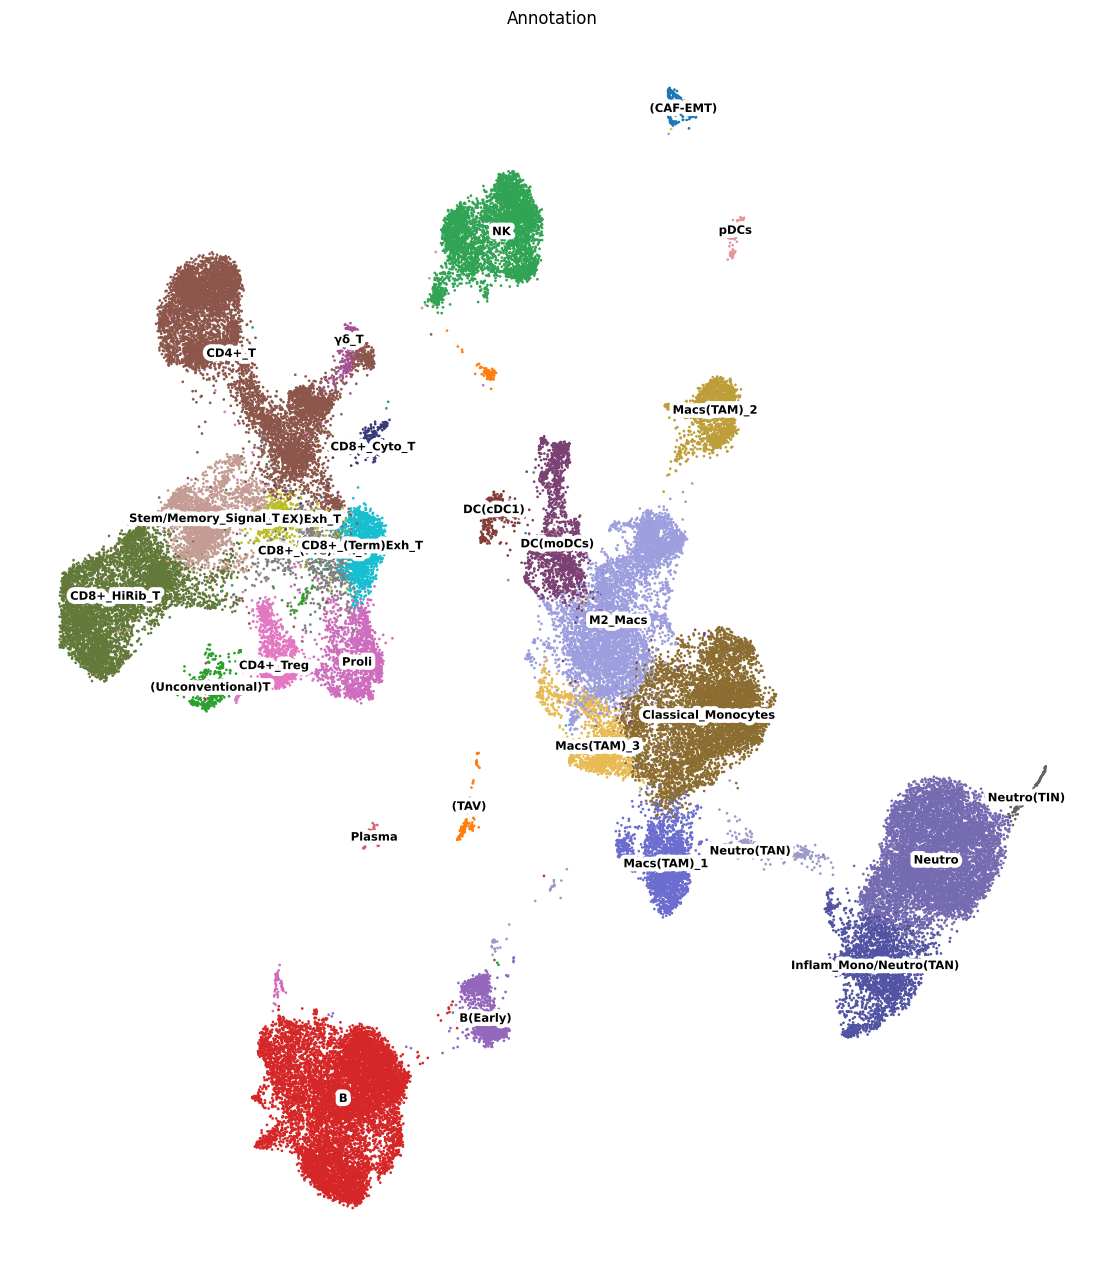

In [ ]:
rcParams['figure.figsize'] = (14,16)
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()
sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,legend_loc='on data',legend_fontsize='small', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False, palette=color_palette_30
)
plt.savefig('../figures/Multi/RNA_scVI_ANNOTATIONS.png', bbox_inches='tight', dpi=400)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


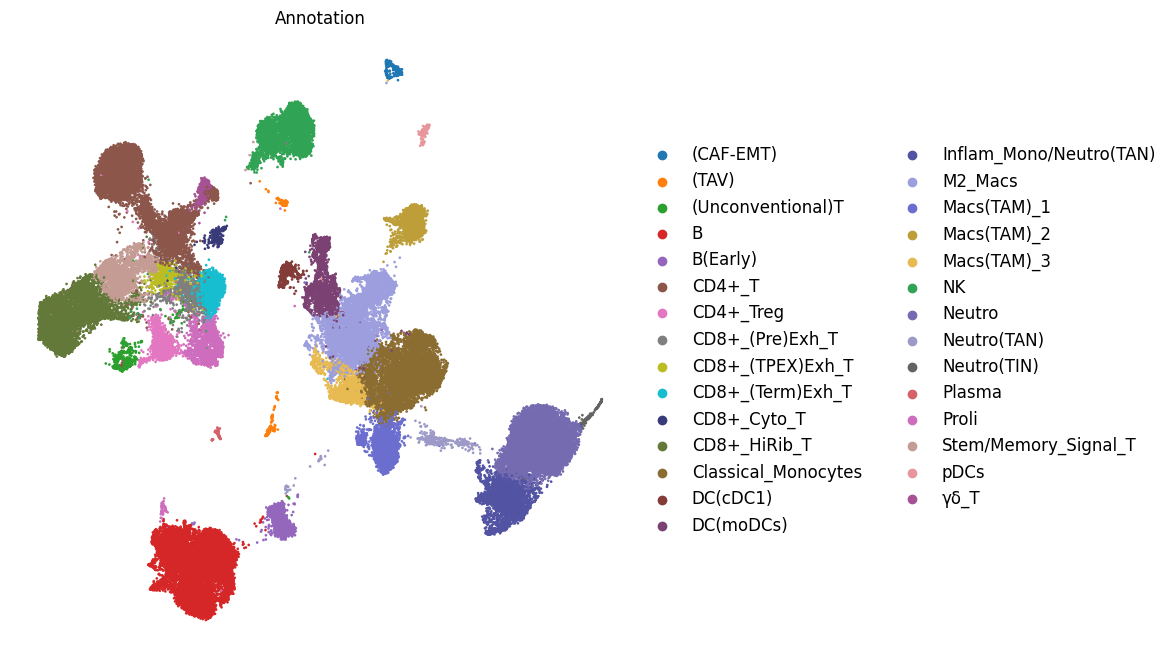

In [52]:
rcParams['figure.figsize'] = (8,8)
adata.obs['Annotation'] = adata.obs['Annotation'].tolist()
sc.pl.umap(
    adata,
    color=['Annotation'],
    # increase horizontal space between panels
    wspace=0.5,legend_fontsize='large', 
    size=15,ncols=2, vmax='p99', legend_fontoutline=6,frameon=False, show=False
)
plt.savefig('../figures/Multi/RNA_scVI_ANNOTATIONS.png', bbox_inches='tight', dpi=400)

# DOTPLOTS

In [100]:
sc.tl.dendrogram(adata, groupby='Annotation')

In [7]:
adata.X = adata.layers['counts'].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'Annotation', use_raw=False, method='wilcoxon')
# sc.pl.rank_genes_groups_dotplot(adata)

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pand

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

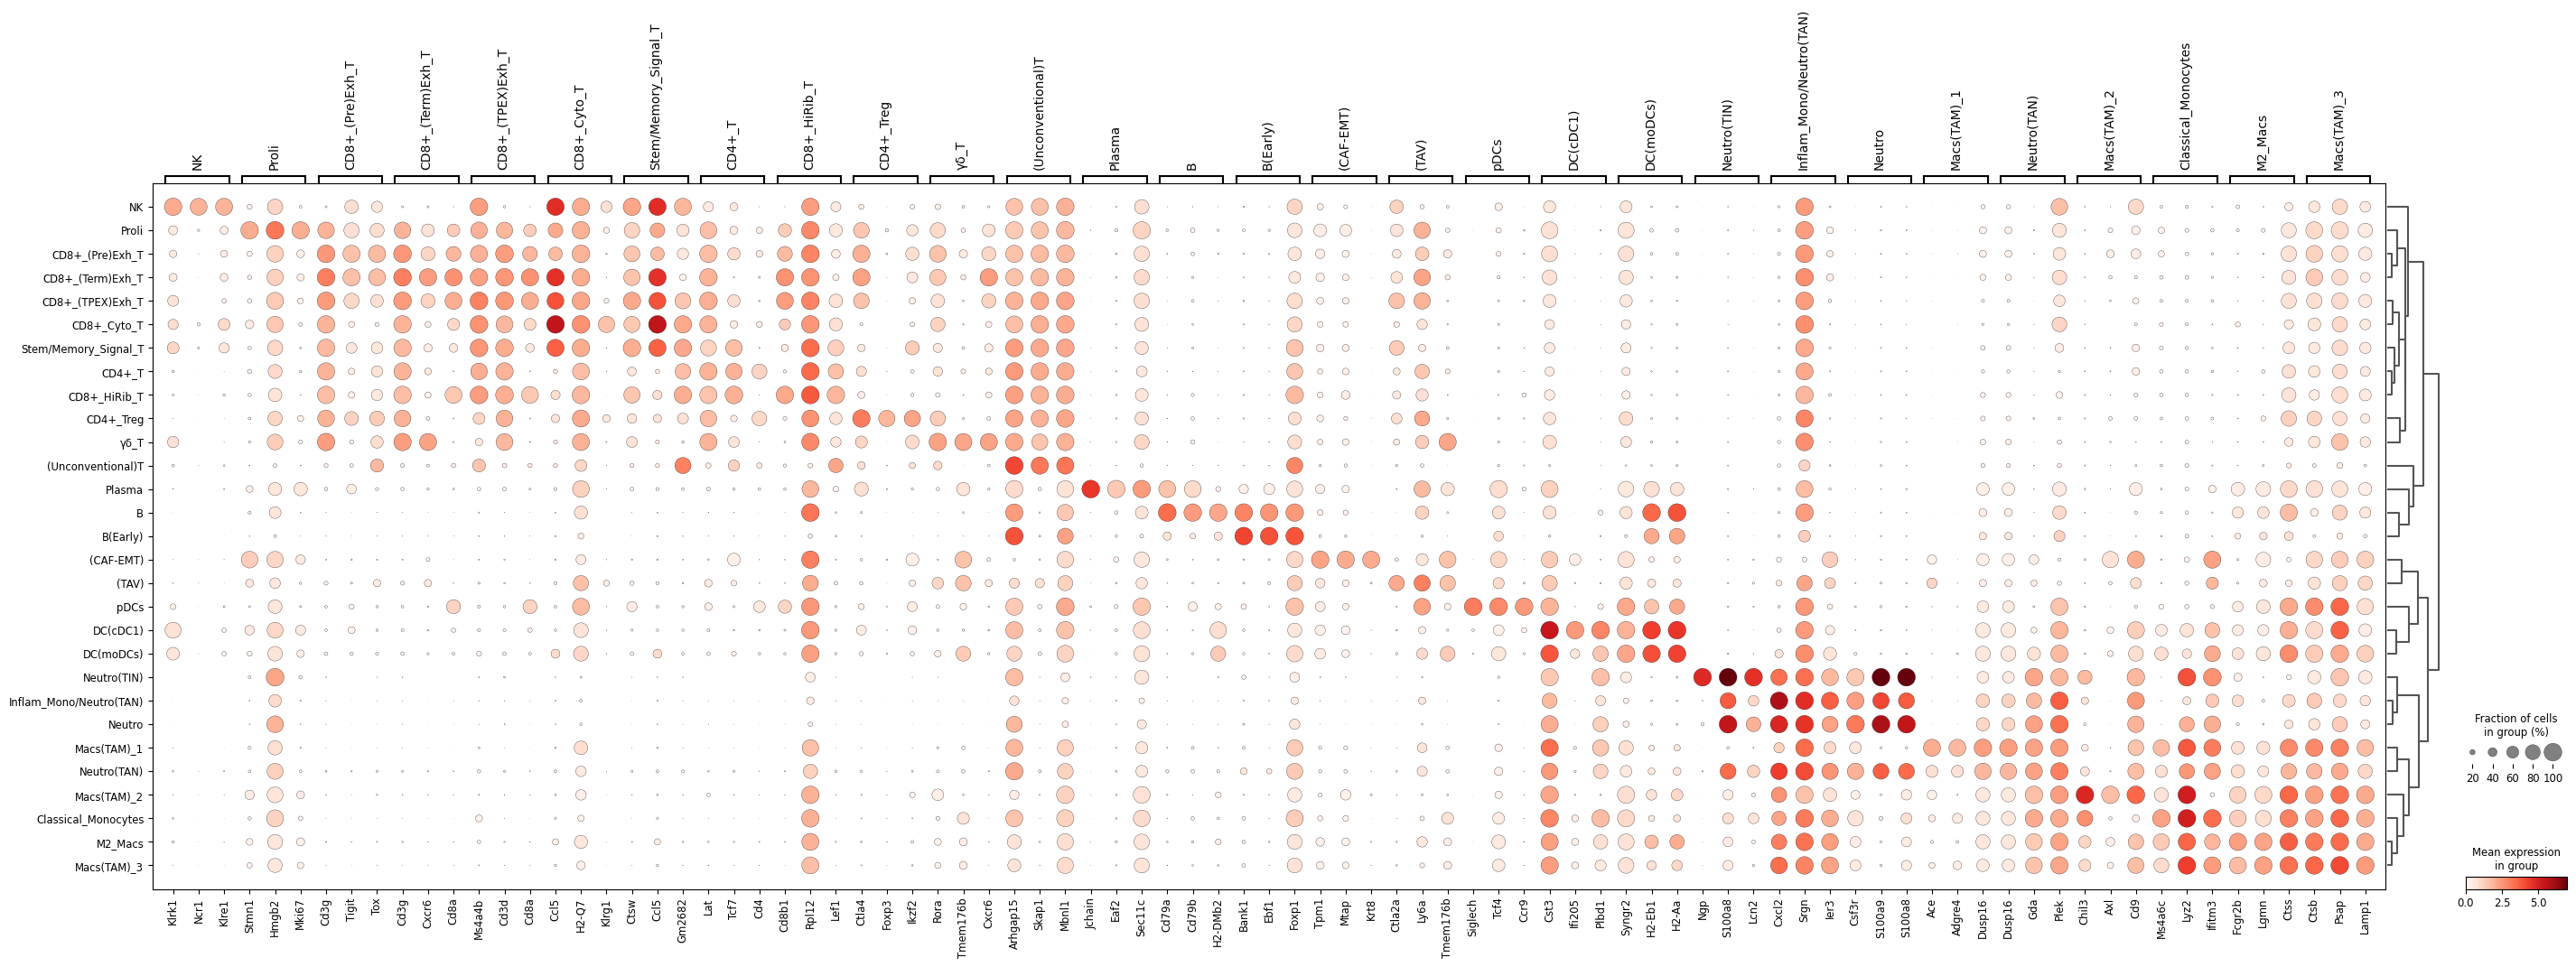

<Figure size 800x400 with 0 Axes>

In [8]:
sc.pl.rank_genes_groups_dotplot(adata, min_logfoldchange=2.5, n_genes=3, use_raw=False)
plt.savefig('../figures/Multi/Dotplot_ANNOTATIONS.pdf', bbox_inches='tight', dpi=400)

## Dotplot Tcells

In [9]:
cell_groups = {
    "T_Cells_CD4": [
        "CD4+_T",
        "CD4+_Treg",
        "Stem/Memory_Signal_T"
    ],
    "T_Cells_CD8": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T"
    ],
    "Cycling_Proliferative_Cells": [
        "Proli"
    ],
    "Unconventional_T": [
        "γδ_T",
        "(Unconventional)T"
    ],
    "B_Cells_and_Plasma_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid_Cells": [
        "Classical_Monocytes",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
    ],
    "Neutros" : [
                "Neutro",
        "Inflam_Mono/Neutro(TAN)",
        "Neutro(TAN)",
        "Neutro(TIN)",
    ],
    "Dendritic" : [
                "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK_Cells": [
        "NK"
    ],
    "Stromal_NonImmune_Cells": [
        "(CAF-EMT)",
        "(TAV)"
    ]
}
cell_colors = {'CD4+_T': '#6820aaff',
 'CD4+_Treg': '#8d58bfd2',
 'Stem/Memory_Signal_T': '#b390d4a6',
 'CD8+_(Term)Exh_T': '#a50f2dff',
 'CD8+_(Pre)Exh_T': '#b43750e1',
 'CD8+_(TPEX)Exh_T': '#c35f73c4',
 'CD8+_HiRib_T': '#d28796a6',
 'CD8+_Cyto_T': '#e1afb988',
 '(Naive)_B': '#000060ff',
 '(Early_Act)_B': '#242477e6',
 '(HiRib)_B': '#49498dcc',
 '(Memory)_B': '#6d6da4b2',
 'B(Early)': '#9292bb99',
 'Plasma': '#b6b6d280',
 'Classical_Monocytes': '#004b00ff',
 'M2_Macs': '#2a692ae1',
 'Macs(TAM)_1': '#558755c4',
 'Macs(TAM)_2': '#80a580a6',
 'Macs(TAM)_3': '#aac3aa88',
 'Neutro': '#a354a0ff',
 'Inflam_Mono/Neutro(TAN)': '#b676b3db',
 'Neutro(TAN)': '#c898c6b8',
 'Neutro(TIN)': '#dabbd994',
 'DC(moDCs)': '#82bf23ff',
 'DC(cDC1)': '#a1cf5ad2',
 'pDCs': '#c0df91a6',
 'NK': '#bf6900ff',
 '(CAF-EMT)': '#68340eff',
 '(TAV)': '#9b785ec4',
 'Proli': '#4f4f4fff',
 'γδ_T': '#680000ff',
 '(Unconventional)T': '#9b5555c4'}
palette_samples = {'S741_Veh': '#1f77b4',
'S743_Veh': '#e377c2',
 'S744_Veh': '#d62728',
 'S760_Veh': '#8c564b',
 'S742_NMDi': '#2ca02c',
 'S745_NMDi': '#9467bd',
 'S746_NMDi': '#ff7f0e',
 'S761_NMDi': '#7f7f7f'
}
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import pandas as pd
import scirpy as ir


In [10]:
adata = adata[adata.obs['Annotation'].isin(cell_groups["T_Cells_CD4"]+cell_groups["T_Cells_CD8"] + cell_groups['Cycling_Proliferative_Cells'])]
adata

View of AnnData object with n_obs × n_vars = 22612 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_n

In [11]:
adata.X = adata.layers['counts'].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'Annotation', use_raw=False, method='wilcoxon')


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 

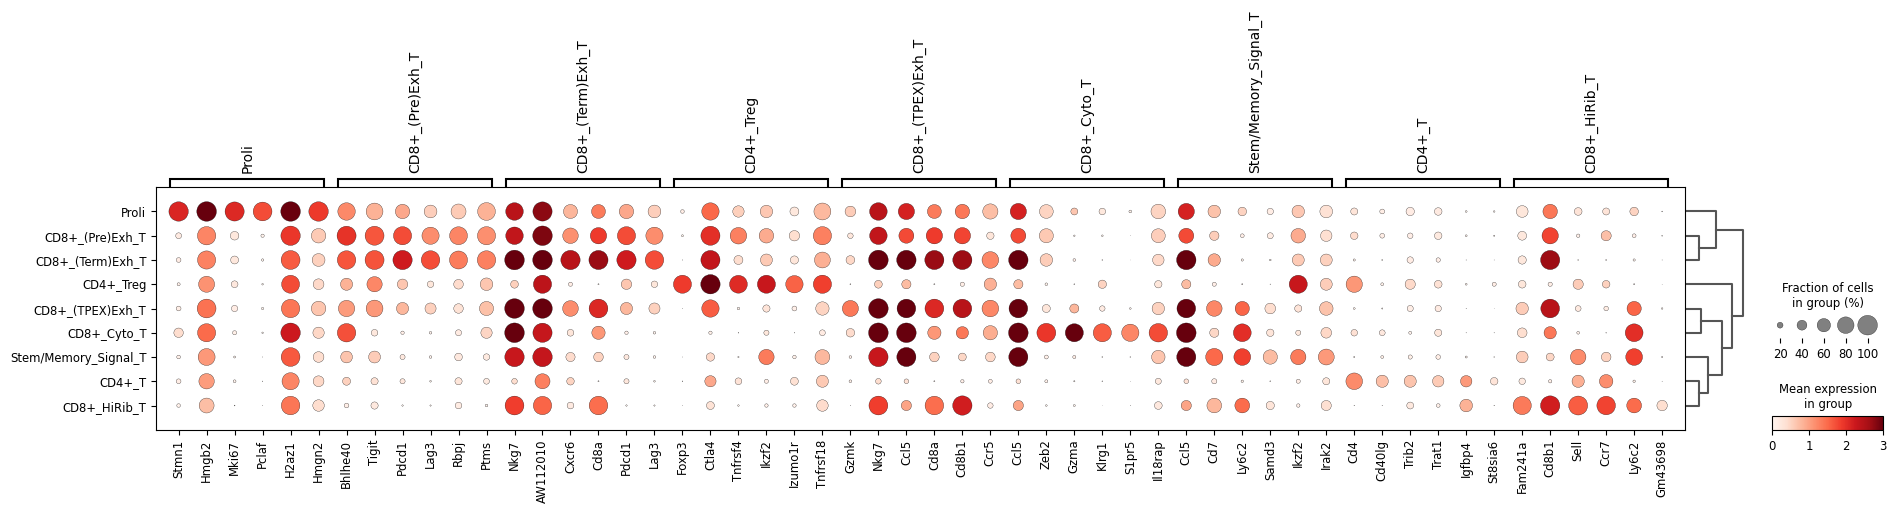

In [12]:
sc.tl.dendrogram(adata, groupby='Annotation')
sc.pl.rank_genes_groups_dotplot(adata, min_logfoldchange=2, n_genes=6,vmax=3, use_raw=False, show=False)
plt.savefig('../../figures/Paper/DOTPLOT_Tcells.png', bbox_inches='tight',dpi=400)
plt.savefig('../../figures/Paper/DOTPLOT_Tcells.pdf', bbox_inches='tight',dpi=400)

## Dotplot MACs

In [13]:
cell_groups = {
    "T_Cells_CD4": [
        "CD4+_T",
        "CD4+_Treg",
        "Stem/Memory_Signal_T"
    ],
    "T_Cells_CD8": [
        "CD8+_(Term)Exh_T",
        "CD8+_(Pre)Exh_T",
        "CD8+_(TPEX)Exh_T",
        "CD8+_HiRib_T",
        "CD8+_Cyto_T"
    ],
    "Cycling_Proliferative_Cells": [
        "Proli"
    ],
    "Unconventional_T": [
        "γδ_T",
        "(Unconventional)T"
    ],
    "B_Cells_and_Plasma_Cells": [
        "(Naive)_B",
        "(Early_Act)_B",
        "(HiRib)_B",
        "(Memory)_B",
        "B(Early)",
        "Plasma"
    ],
    "Myeloid_Cells": [
        "Classical_Monocytes",
        "M2_Macs",
        "Macs(TAM)_1",
        "Macs(TAM)_2",
        "Macs(TAM)_3",
    ],
    "Neutros" : [
                "Neutro",
        "Inflam_Mono/Neutro(TAN)",
        "Neutro(TAN)",
        "Neutro(TIN)",
    ],
    "Dendritic" : [
                "DC(moDCs)",
        "DC(cDC1)",
        "pDCs"
    ],
    "NK_Cells": [
        "NK"
    ],
    "Stromal_NonImmune_Cells": [
        "(CAF-EMT)",
        "(TAV)"
    ]
}
cell_colors = {'CD4+_T': '#6820aaff',
 'CD4+_Treg': '#8d58bfd2',
 'Stem/Memory_Signal_T': '#b390d4a6',
 'CD8+_(Term)Exh_T': '#a50f2dff',
 'CD8+_(Pre)Exh_T': '#b43750e1',
 'CD8+_(TPEX)Exh_T': '#c35f73c4',
 'CD8+_HiRib_T': '#d28796a6',
 'CD8+_Cyto_T': '#e1afb988',
 '(Naive)_B': '#000060ff',
 '(Early_Act)_B': '#242477e6',
 '(HiRib)_B': '#49498dcc',
 '(Memory)_B': '#6d6da4b2',
 'B(Early)': '#9292bb99',
 'Plasma': '#b6b6d280',
 'Classical_Monocytes': '#004b00ff',
 'M2_Macs': '#2a692ae1',
 'Macs(TAM)_1': '#558755c4',
 'Macs(TAM)_2': '#80a580a6',
 'Macs(TAM)_3': '#aac3aa88',
 'Neutro': '#a354a0ff',
 'Inflam_Mono/Neutro(TAN)': '#b676b3db',
 'Neutro(TAN)': '#c898c6b8',
 'Neutro(TIN)': '#dabbd994',
 'DC(moDCs)': '#82bf23ff',
 'DC(cDC1)': '#a1cf5ad2',
 'pDCs': '#c0df91a6',
 'NK': '#bf6900ff',
 '(CAF-EMT)': '#68340eff',
 '(TAV)': '#9b785ec4',
 'Proli': '#4f4f4fff',
 'γδ_T': '#680000ff',
 '(Unconventional)T': '#9b5555c4'}
palette_samples = {'S741_Veh': '#1f77b4',
'S743_Veh': '#e377c2',
 'S744_Veh': '#d62728',
 'S760_Veh': '#8c564b',
 'S742_NMDi': '#2ca02c',
 'S745_NMDi': '#9467bd',
 'S746_NMDi': '#ff7f0e',
 'S761_NMDi': '#7f7f7f'
}
import os
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns
import pandas as pd
import scirpy as ir


In [14]:
adata = sc.read('../objects/adata_annotated.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [15]:
adata = adata[adata.obs['Annotation'].isin(cell_groups["Myeloid_Cells"])]
adata

View of AnnData object with n_obs × n_vars = 17625 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_n

In [16]:
adata.X = adata.layers['counts'].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'Annotation', use_raw=False, method='wilcoxon')


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [17]:
sc.tl.dendrogram(adata, groupby='Annotation')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 

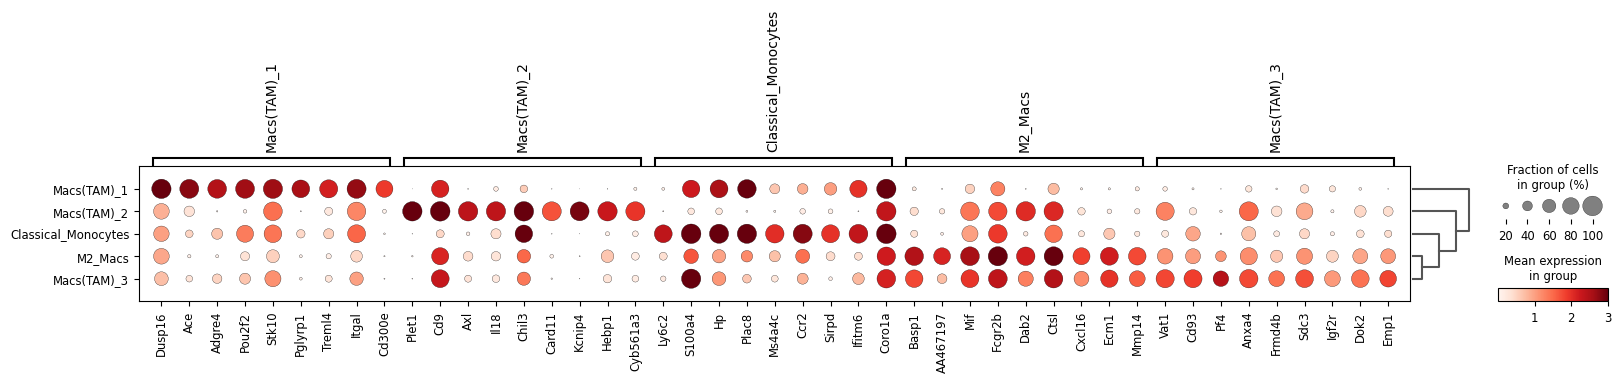

<Figure size 700x700 with 0 Axes>

In [18]:
sc.tl.dendrogram(adata, groupby='Annotation')

sc.pl.rank_genes_groups_dotplot(adata, min_logfoldchange=1.5, n_genes=9,vmax=3, use_raw=False)
plt.savefig('../../figures/Paper/DOTPLOT_Macros.png', bbox_inches='tight',dpi=400)
plt.savefig('../../figures/Paper/DOTPLOT_Macros.pdf', bbox_inches='tight',dpi=400)

In [19]:
adata = sc.read('../objects/adata_annotated.h5ad', compression='gzip')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [20]:
adata = adata[adata.obs['Annotation'].isin(cell_groups["Neutros"])]
adata

View of AnnData object with n_obs × n_vars = 11296 × 25760
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_n

In [21]:
adata = adata[:,~adata.var['mt']]

In [22]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")

adata.var['mt'].sum()

/tmp/ipykernel_6457/564811317.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var_names.str.startswith("mt-")


13

In [23]:
adata = adata[:,~adata.var['mt']].copy()
adata

AnnData object with n_obs × n_vars = 11296 × 25747
    obs: 'library', 'sample_barcode', 'sample_name', 'source', 'DoubletDetection', 'DoubletDetection_score', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden_0.1', 'leiden_0.15', 'Annotation_l1', 'leiden', 'Annotation_l2', 'qc_filter_reason', 'L1_Voting', 'L2_Voting', 'cd4_score', 'cd8_score', 'Monocyte_score', 'Macrophage_score', 'Annotation'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
   

In [24]:
adata.X = adata.layers['counts'].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.tl.rank_genes_groups(adata, 'Annotation', use_raw=False, method='wilcoxon')
sc.tl.dendrogram(adata, groupby='Annotation')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 

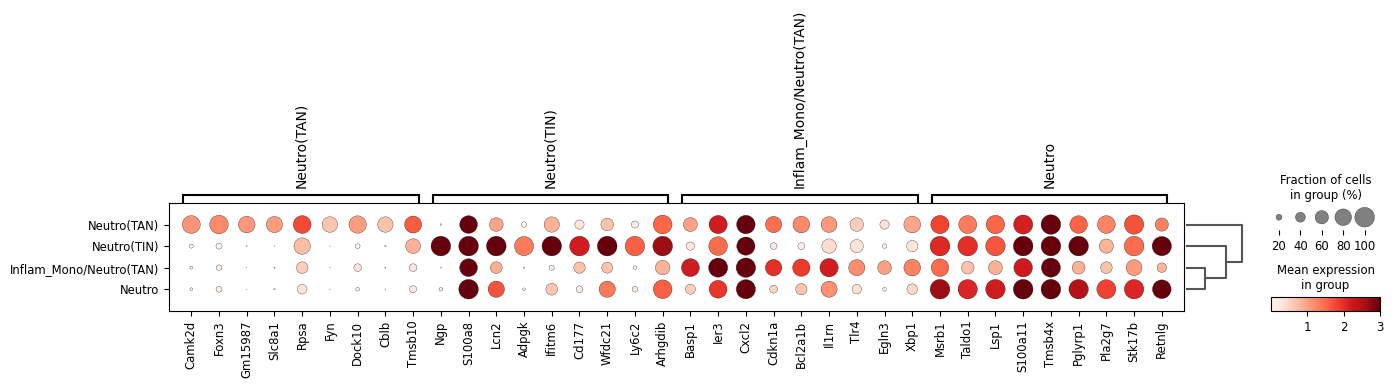

<Figure size 700x700 with 0 Axes>

: 

In [ ]:
sc.tl.dendrogram(adata, groupby='Annotation')

sc.pl.rank_genes_groups_dotplot(adata, min_logfoldchange=1.5, n_genes=9,vmax=3, use_raw=False)
plt.savefig('../../figures/Paper/DOTPLOT_Neutros.png', bbox_inches='tight',dpi=400)
plt.savefig('../../figures/Paper/DOTPLOT_Neutros.pdf', bbox_inches='tight',dpi=400)